In [ ]:
#@title
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Load dataset
dataset = pd.read_csv("/content/male_abuse_2k_data.csv")

target = 'Are you (male) a victim of domestic abuse by your wife?'
for i in dataset.columns:
  print(i+': ')
  print(dataset[i].unique())
  print()

Residence type: 
['urban' 'rural' 'suburban']

Place of residence: 
['Dhaka' 'Barisal' 'Rangpur' 'Sylhet' 'Comilla' 'Khulna' 'Mymensingh'
 'Rajshahi' 'Chittagong']

Age: 
[41 22 23 29 43 30 38 40 21 31 39 25 32 20 35 44 34 27 37 24 45 26 42 36
 33 28]

Profession: 
['Unemployed' 'Employed' 'Businessman' 'Abroad' 'Student']

Level of education: 
['High school' 'Postgraduate' 'Graduate']

Family type: 
['Single family' 'Joint family (without in-laws)'
 'Joint family (with in-laws)']

Family having children: 
['married without children' 'married with children']

Head of the family: 
[1 0]

Monthly income: 
['0' '50000-More' '25001-50000' '15001-25000' '5001-10000']

Monthly income percentage allocated for wife: 
['0%' '51-75%' '100%' '31-50%' '1-10%' '11-30%']

First torture experience: 
['Within 6 months to 12 months of marriage' 'After 12 months of marriage'
 'Between 2nd to 6th month of marriage' 'Within the 1st month of marriage']

First type of torture: 
['Physical, mental, verbal' '

In [ ]:
#@title
import warnings
warnings.filterwarnings("ignore")

import os
import gc
import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics, preprocessing
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras import utils

In [ ]:
#@title
from sklearn import metrics, preprocessing
features = [x for x in dataset.columns if x not in ["Are you (male) a victim of domestic abuse by your wife?",'Age']]

for feat in features:
    lbl_enc = preprocessing.LabelEncoder()
    dataset[feat] = lbl_enc.fit_transform(dataset[feat].fillna("-1").astype(str).values)

In [ ]:
#@title
df = dataset
target = 'Are you (male) a victim of domestic abuse by your wife?'
X = df.drop(columns=target)
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print('Abused in train data: ',len(y_train[y_train==1]))
print('Not abused in train data: ',len(y_train[y_train==0]))
print('Ratio in train data => Abused : Not Abused = ', round(len(y_train[y_train==1])/len(y_train[y_train==0])),': 1')
print('Abused in test data: ',len(y_test[y_test==1]))
print('Not abused in test data: ',len(y_test[y_test==0]))
print('Ratio in test data => Abused : Not Abused = ', round(len(y_test[y_test==1])/len(y_test[y_test==0])),': 1')

Abused in train data:  246
Not abused in train data:  1354
Ratio in train data => Abused : Not Abused =  0 : 1
Abused in test data:  62
Not abused in test data:  338
Ratio in test data => Abused : Not Abused =  0 : 1


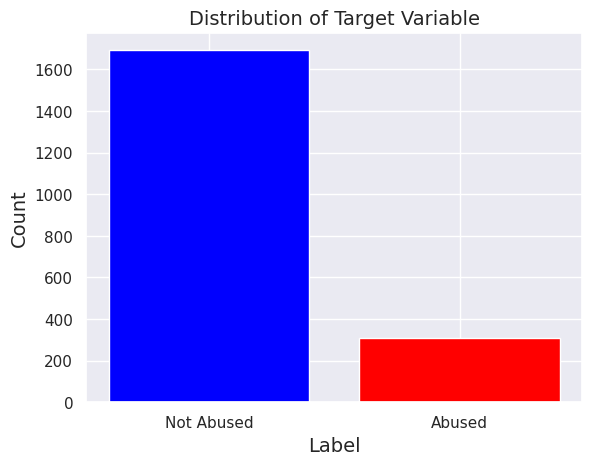

In [ ]:
import matplotlib.pyplot as plt

# Assuming '0' represents 'not abused' and '1' represents 'abused'
colors = ['blue', 'red']

y = df['Are you (male) a victim of domestic abuse by your wife?']
x = y.value_counts()

plt.bar(x.index, x, color=colors)
plt.gca().set_xticks([0, 1])
plt.title('Distribution of Target Variable', fontsize=14)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Abused', 'Abused'])

plt.show()


In [ ]:
#@title
print(x)
print('Ratio: ', round(x[1]/x[0])," : 1 = Abused : Not Abused")

Are you (male) a victim of domestic abuse by your wife?
0    1692
1     308
Name: count, dtype: int64
Ratio:  0  : 1 = Abused : Not Abused


In [ ]:
for i in df.columns:
  print(i+': ')
  print(df[i].unique())
  print()

Residence type: 
[2 0 1]

Place of residence: 
[3 0 7 8 2 4 5 6 1]

Age: 
[41 22 23 29 43 30 38 40 21 31 39 25 32 20 35 44 34 27 37 24 45 26 42 36
 33 28]

Profession: 
[4 2 1 0 3]

Level of education: 
[1 2 0]

Family type: 
[2 1 0]

Family having children: 
[1 0]

Head of the family: 
[1 0]

Monthly income: 
[0 3 2 1 4]

Monthly income percentage allocated for wife: 
[0 5 2 4 1 3]

First torture experience: 
[2 0 1 3]

First type of torture: 
[2 5 0 3 1 4]

Current form of abuse: 
[3 5 0 2 4 1]

Place of most abuse: 
[1 0 2]

Type of marriage: 
[0 1]

Spouse divorced before the current marriage: 
[2 0 3 1]

Duration of current marriage: 
[3 0 1 2]

Extramarital affairs?: 
[1 2 0 3]

Level of satisfaction with marital life: 
[5 0 1 3 4 2]

Spouse physically capable of having sex: 
[0 1 2 3]

Level of satisfaction with sexual relationship patterns: 
[0 2 4 1 3 5]

Do you want Bangladesh to pass male torture law?: 
[1 0]

Are you (male) a victim of domestic abuse by your wife?: 
[0 1]



<Figure size 1000x800 with 0 Axes>

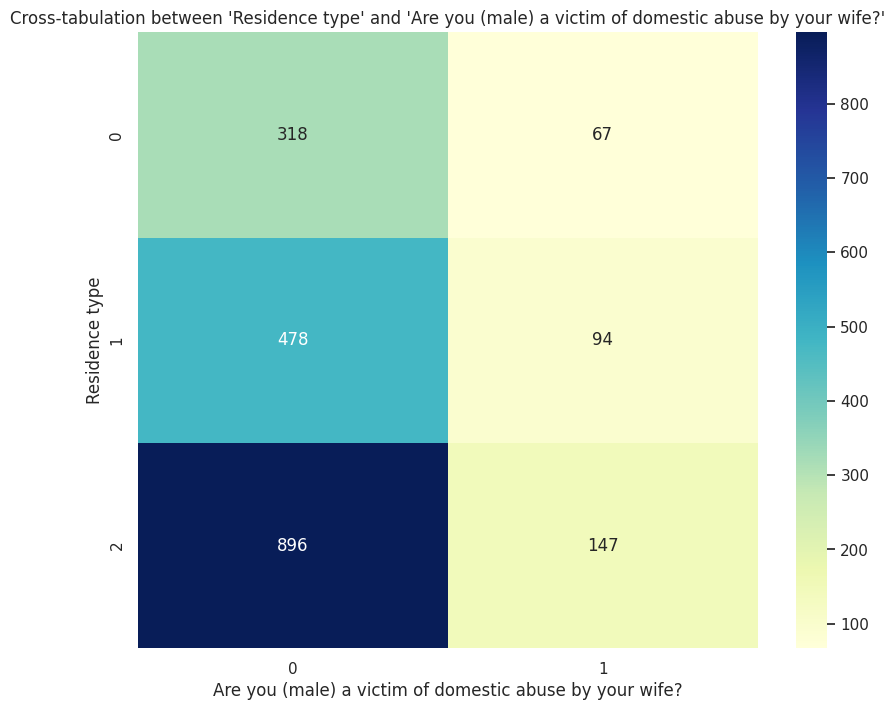

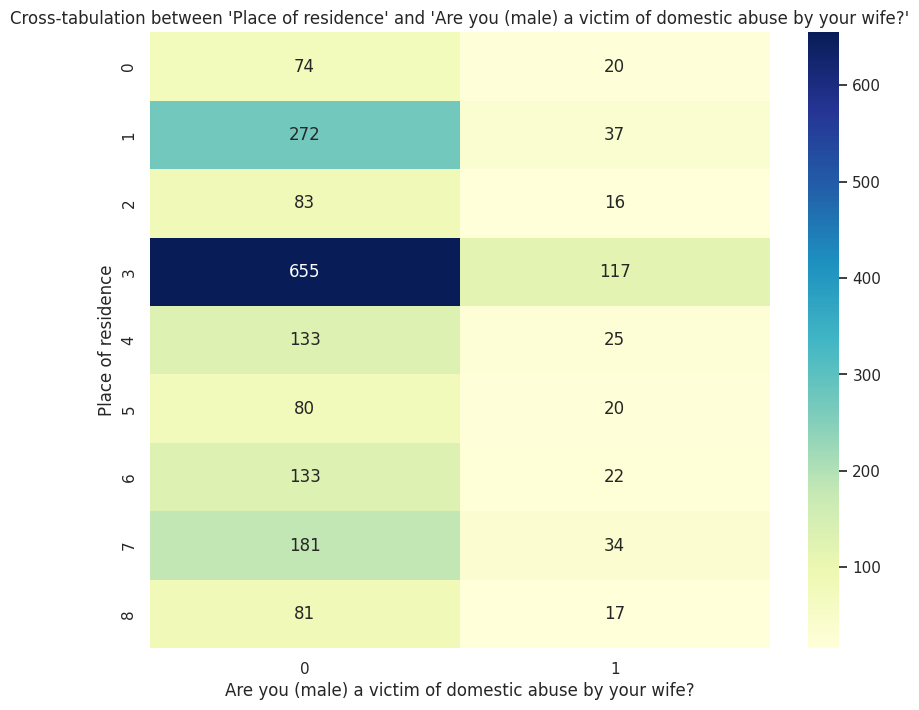

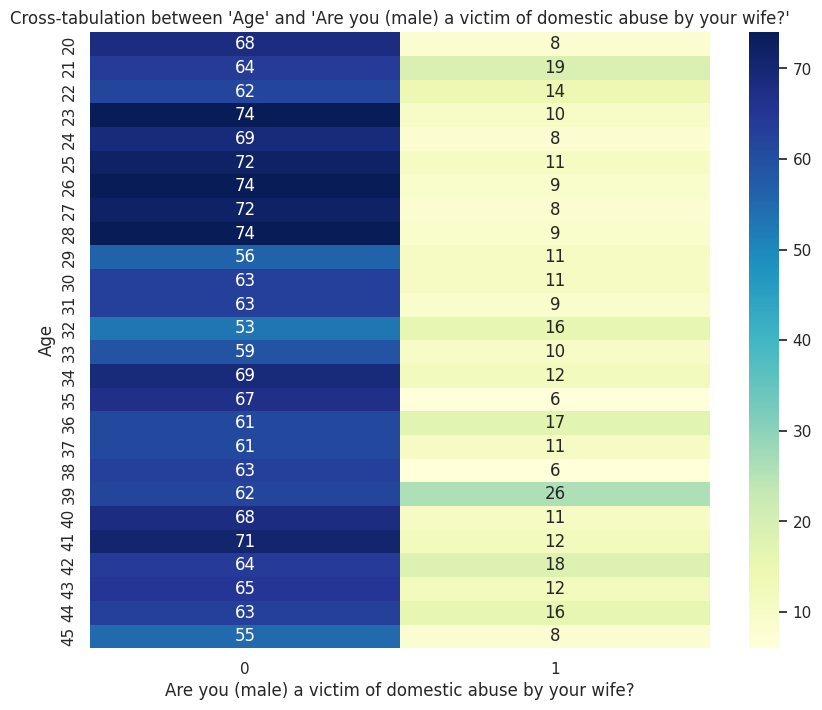

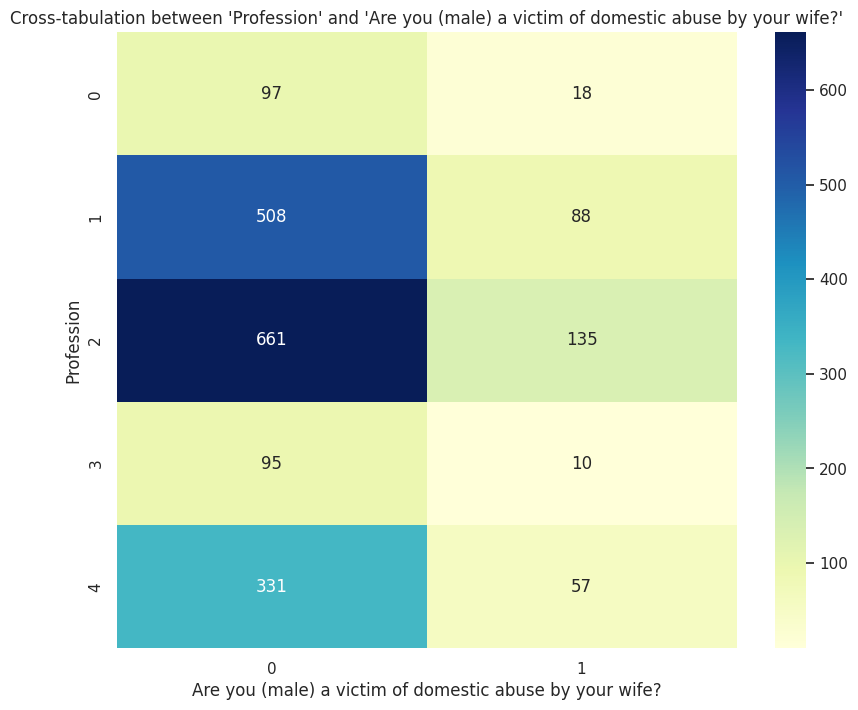

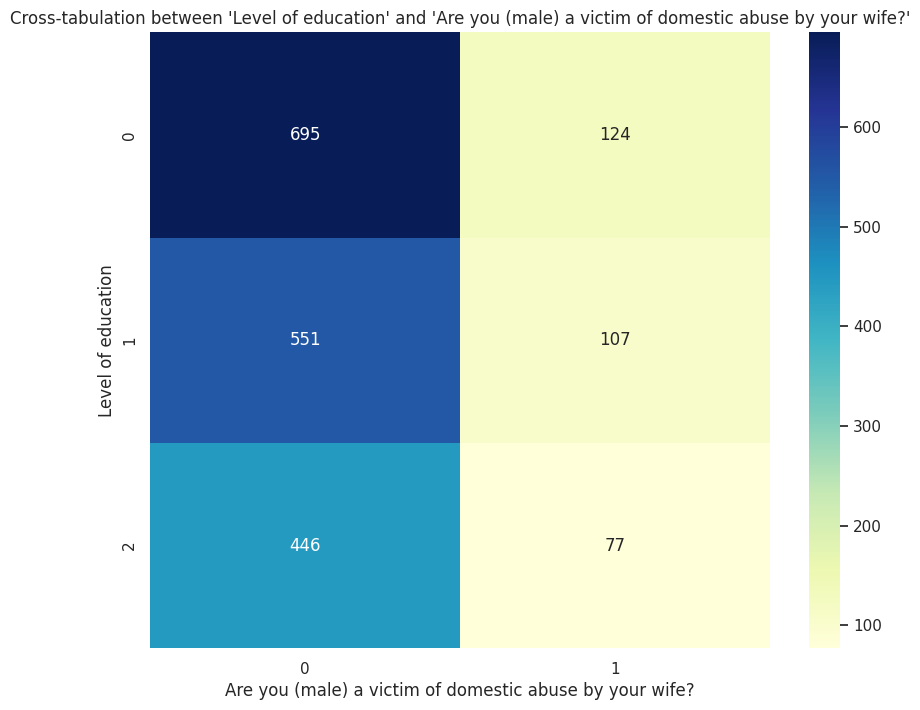

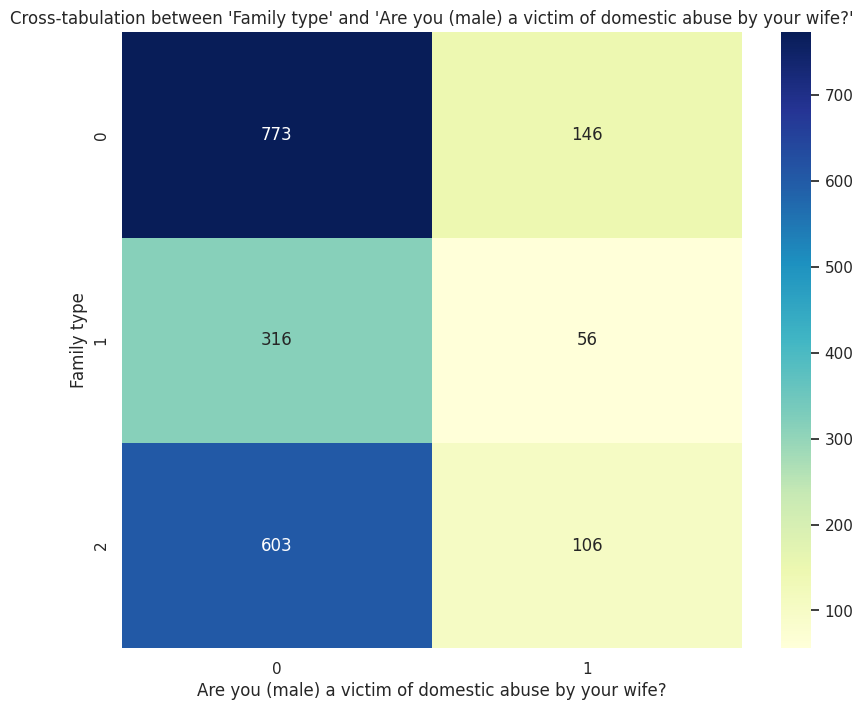

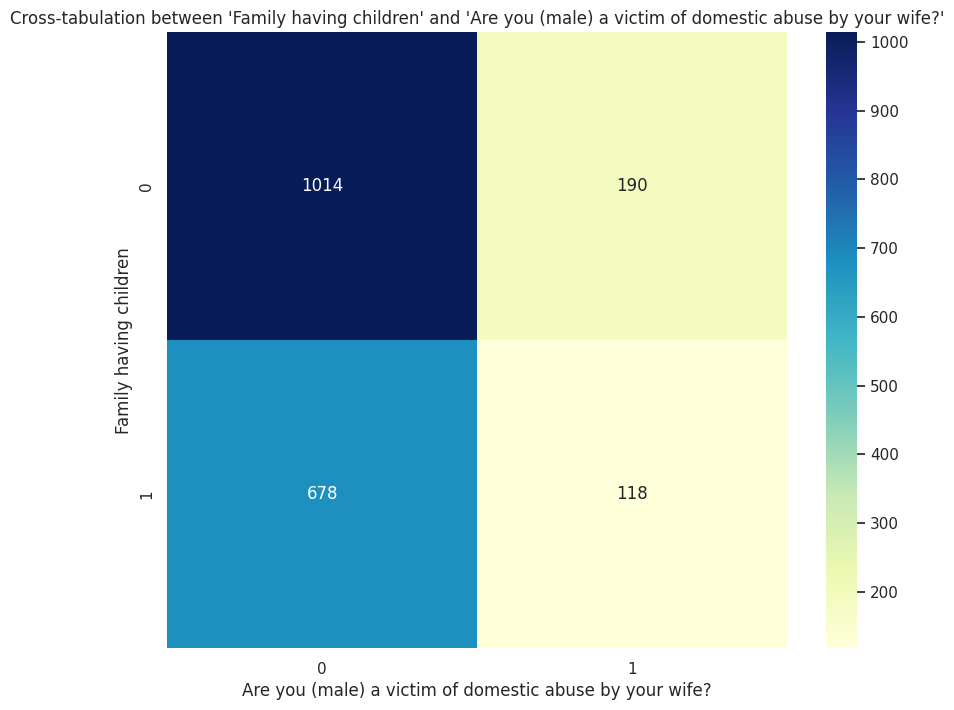

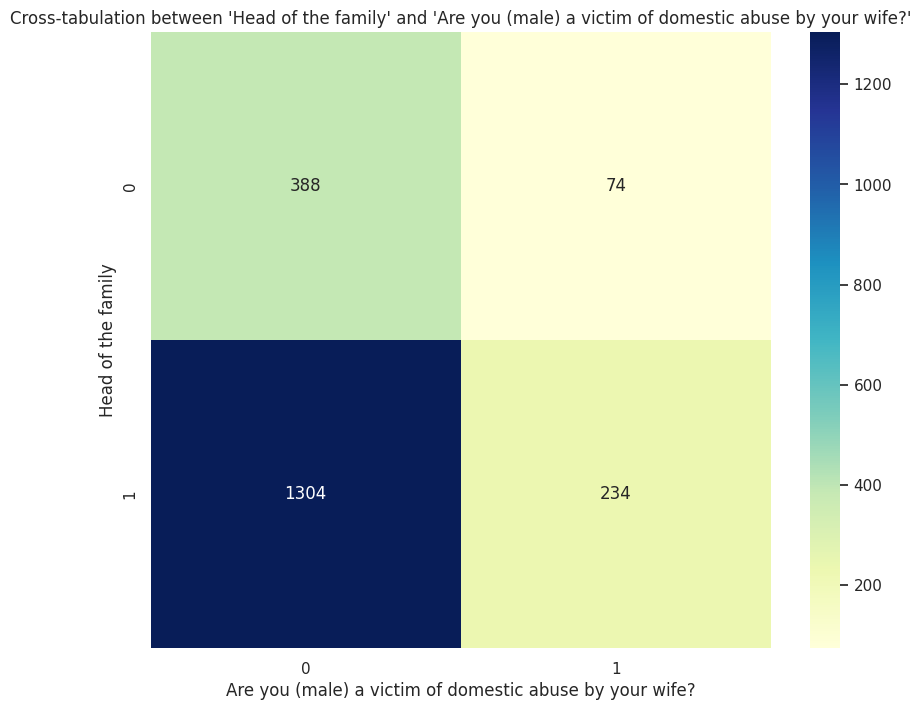

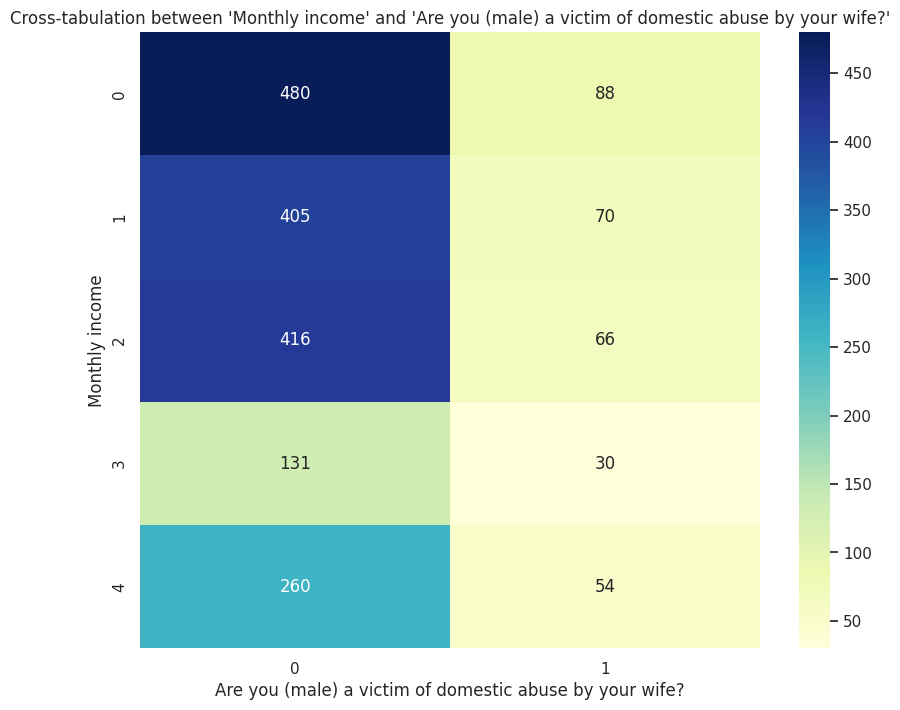

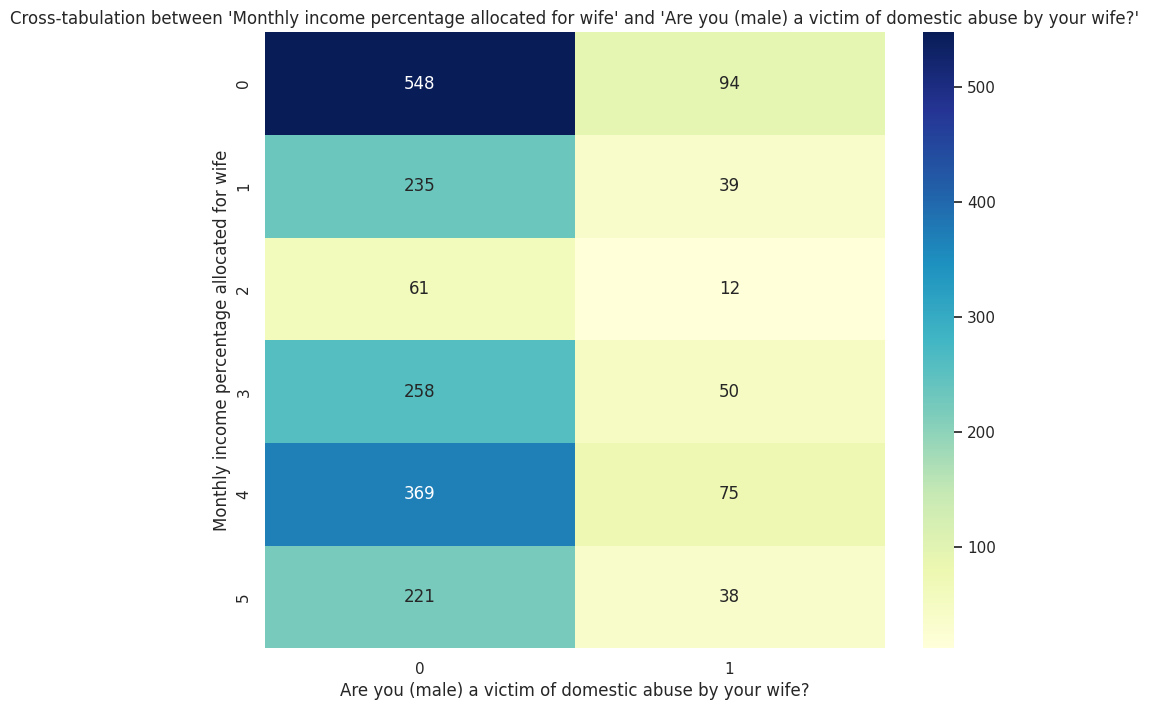

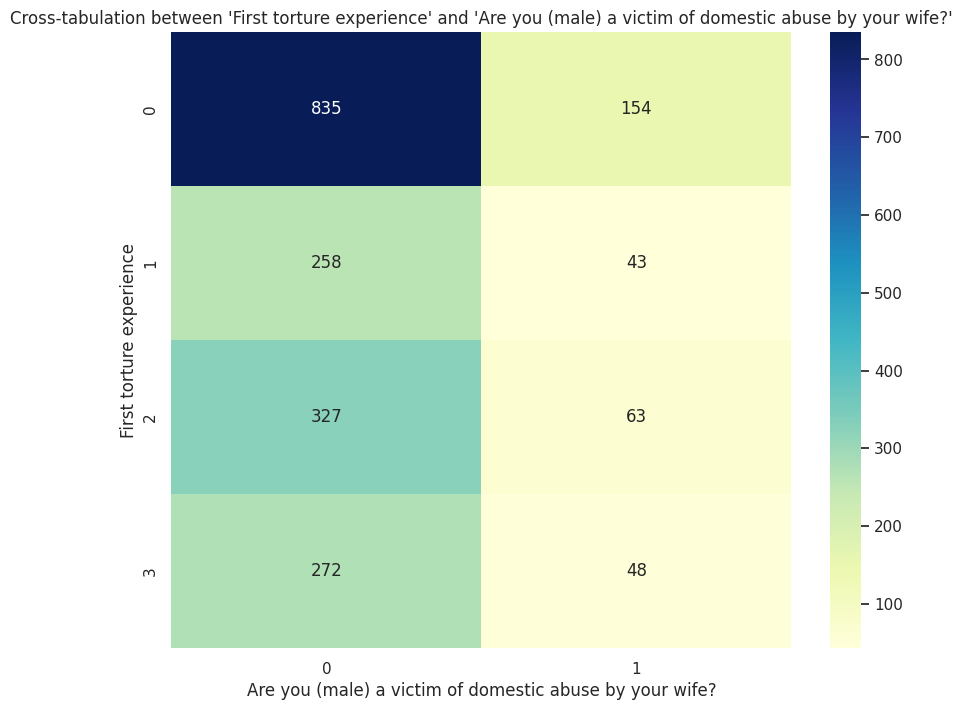

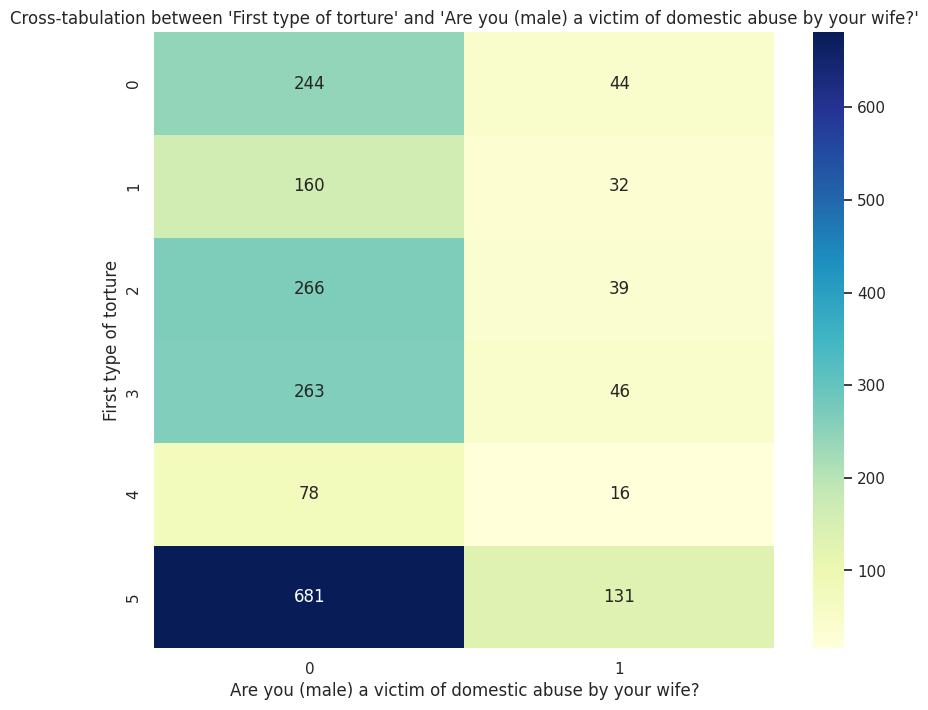

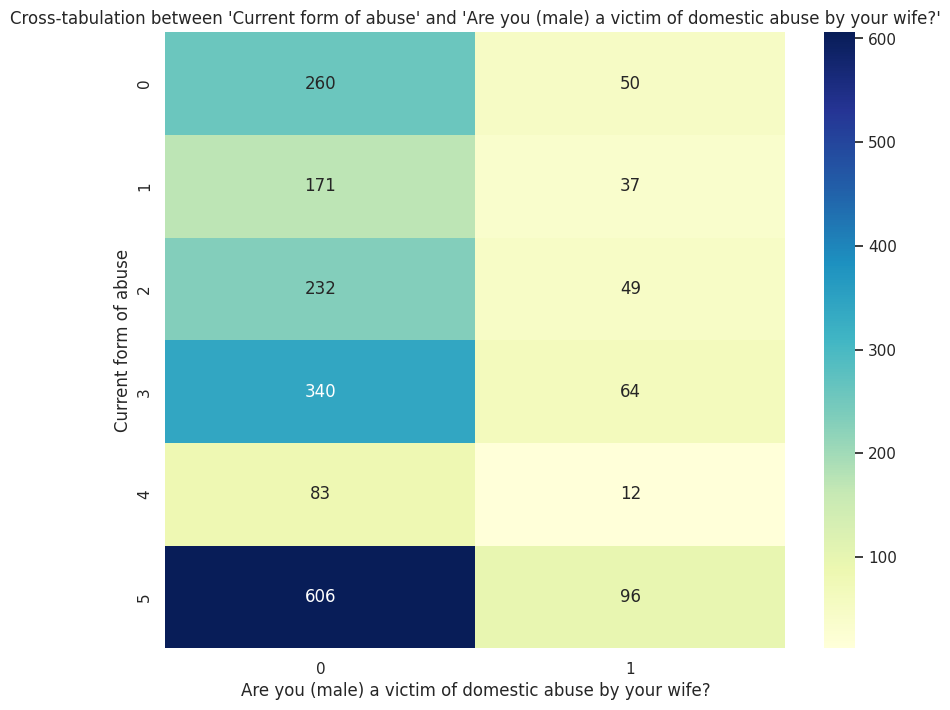

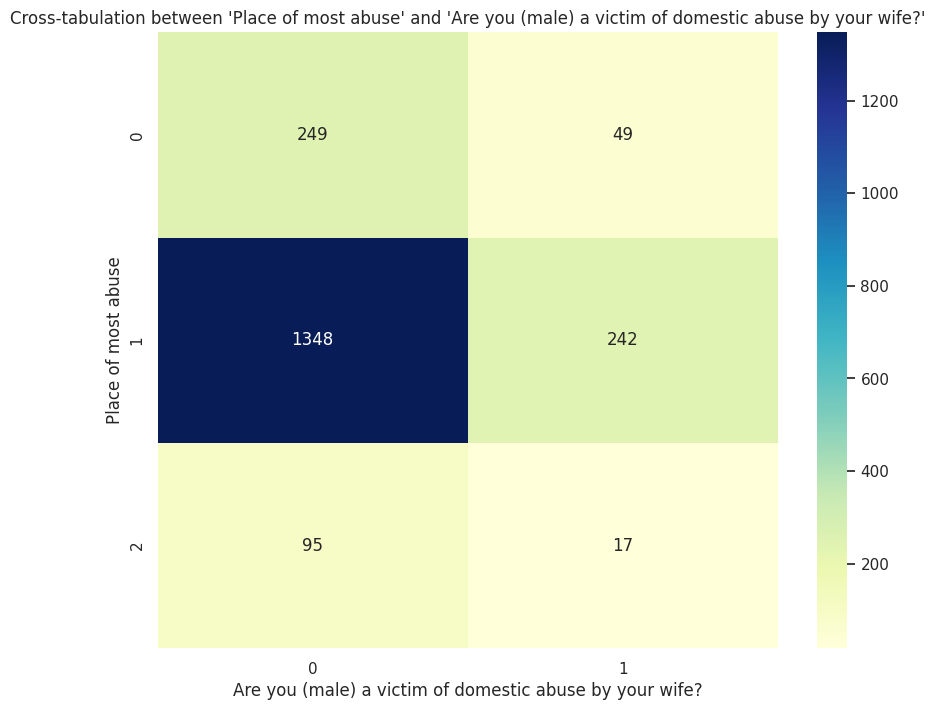

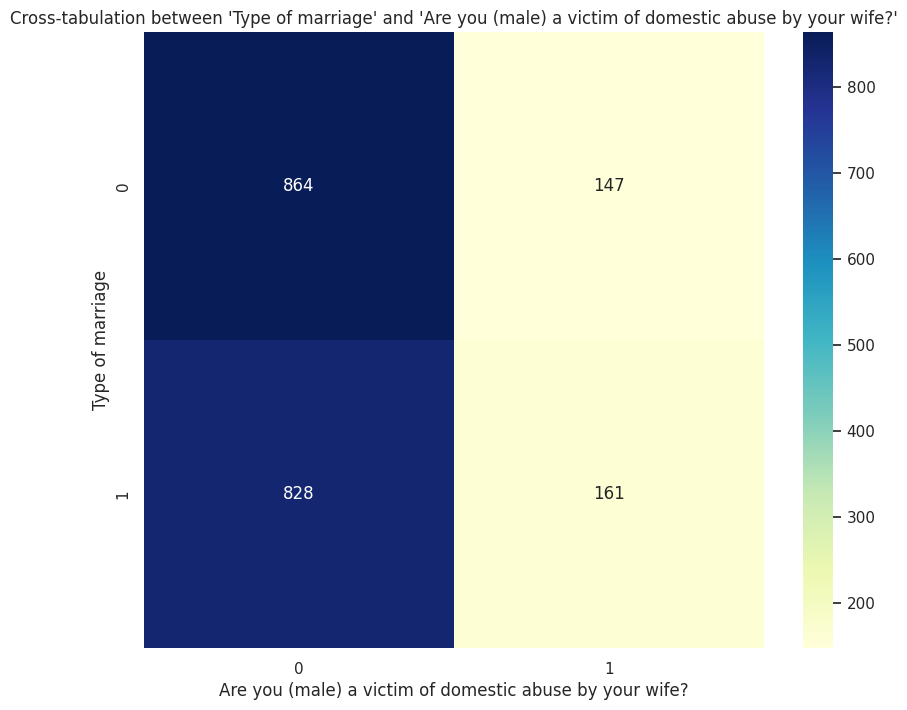

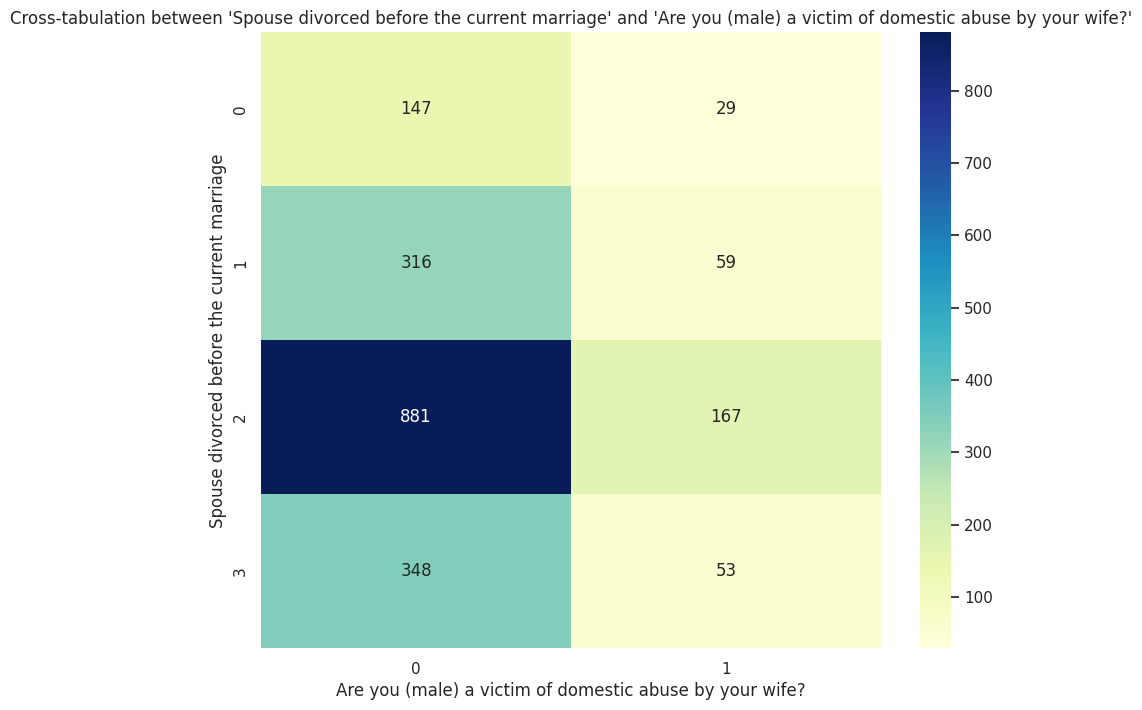

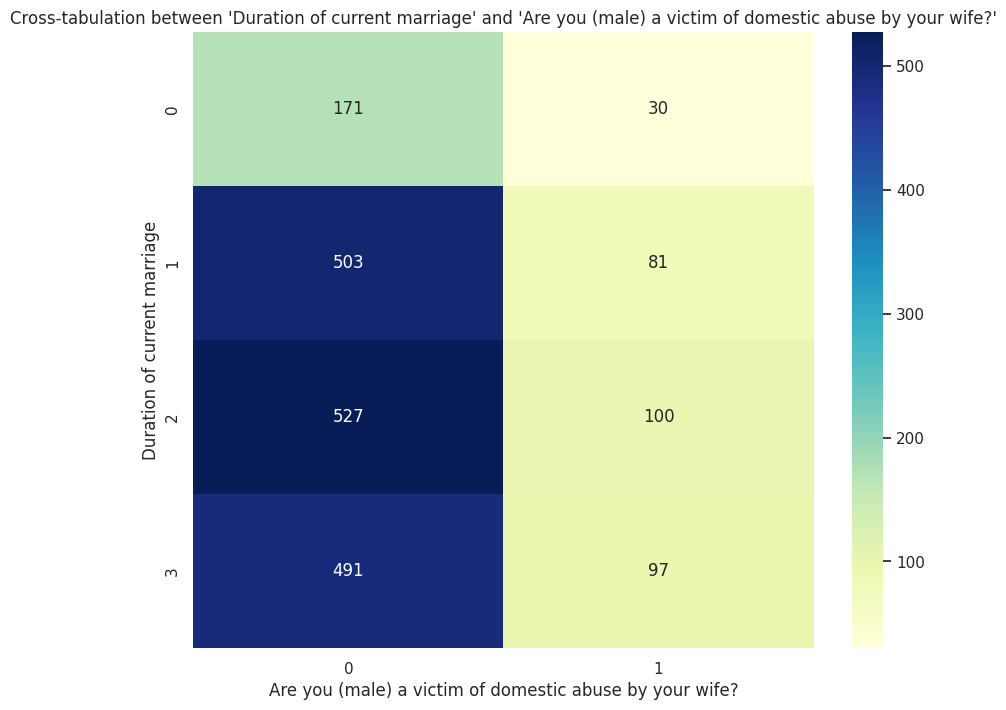

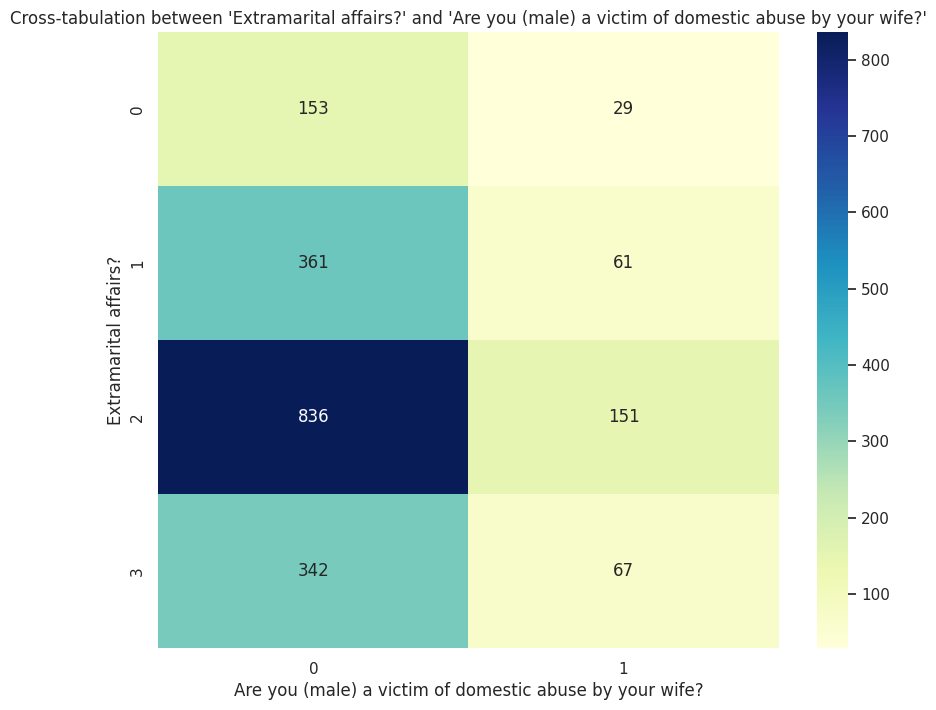

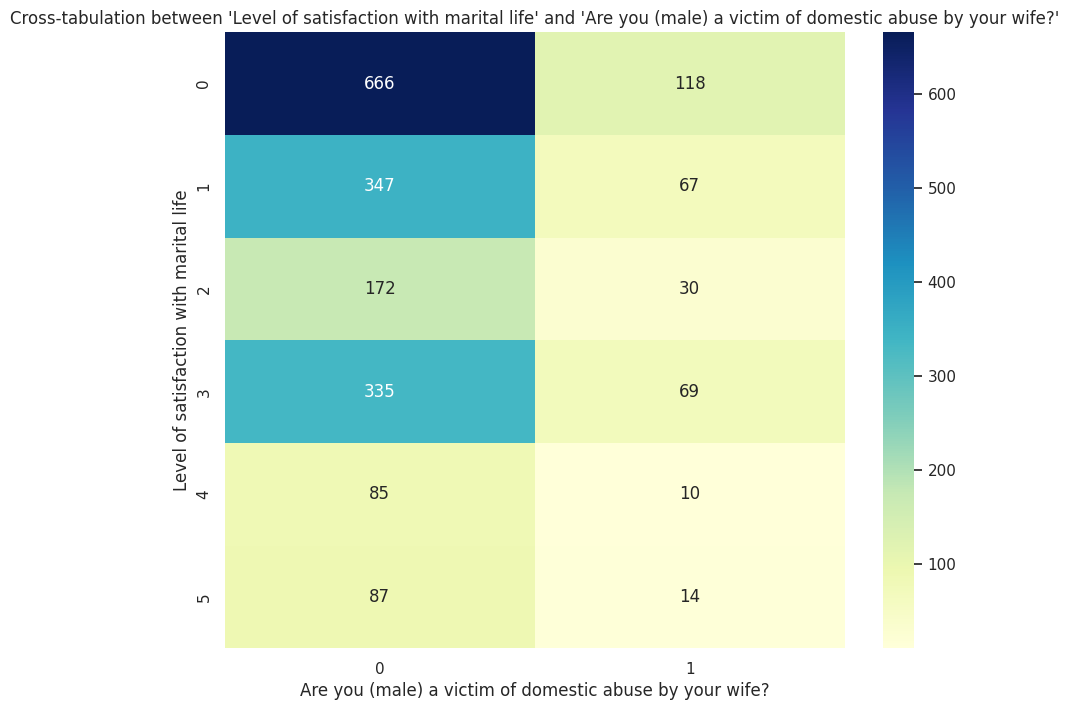

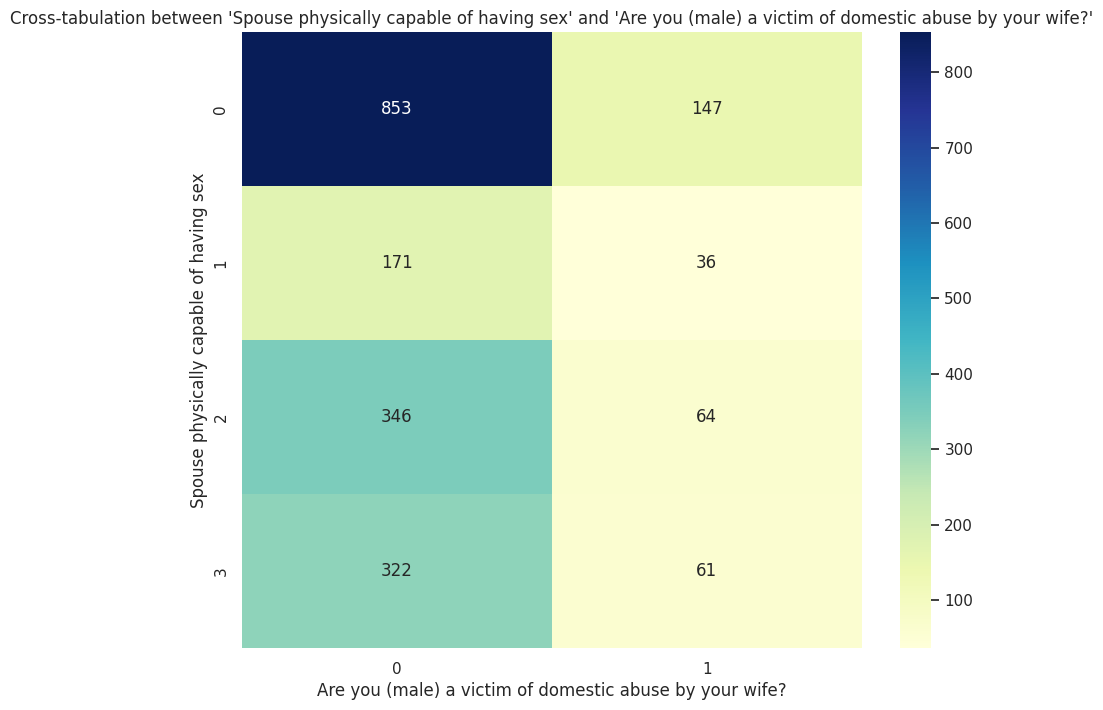

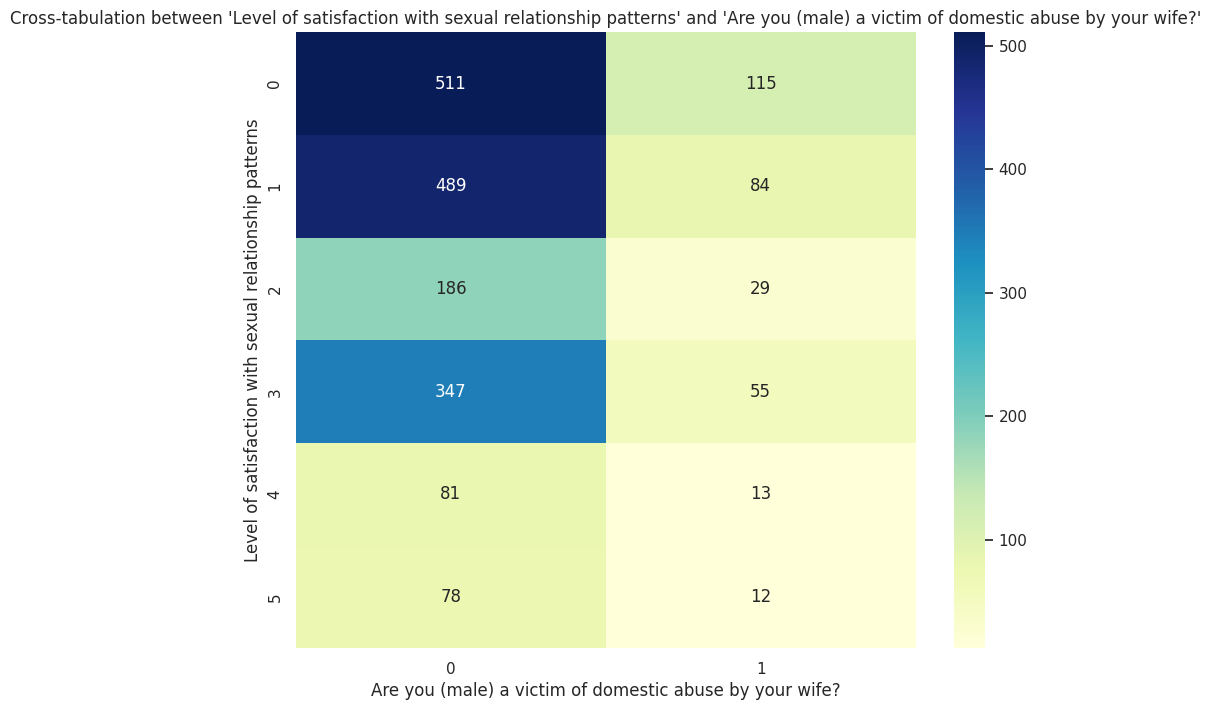

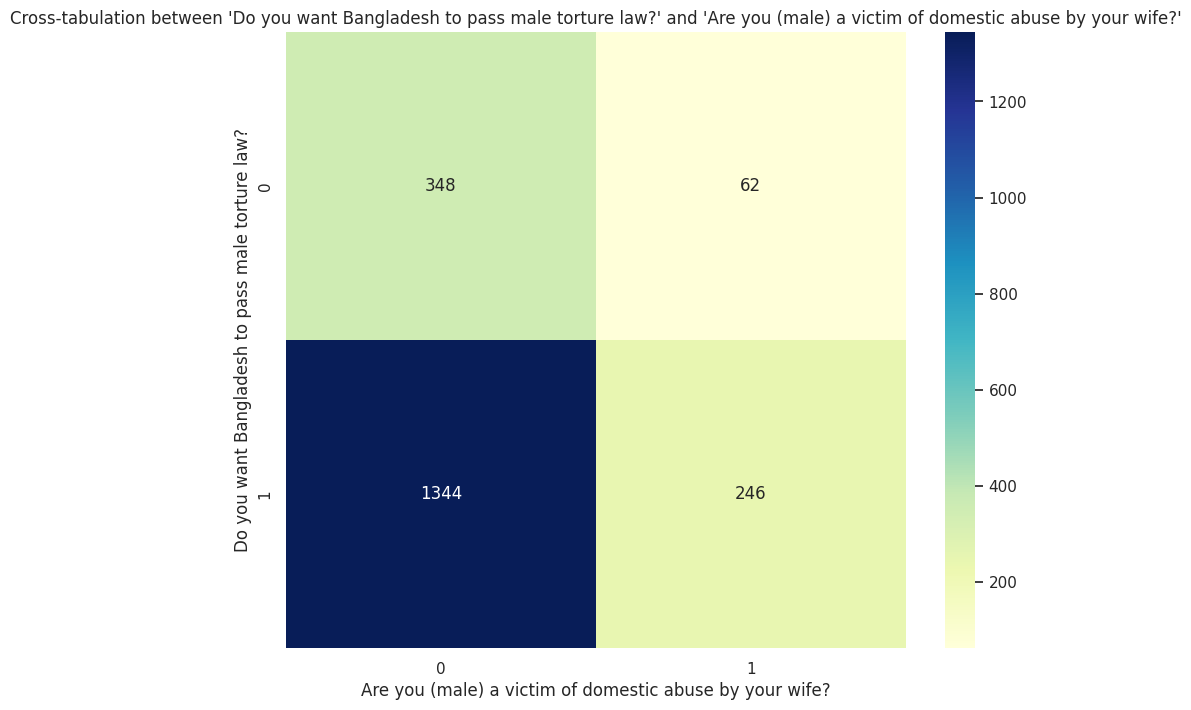

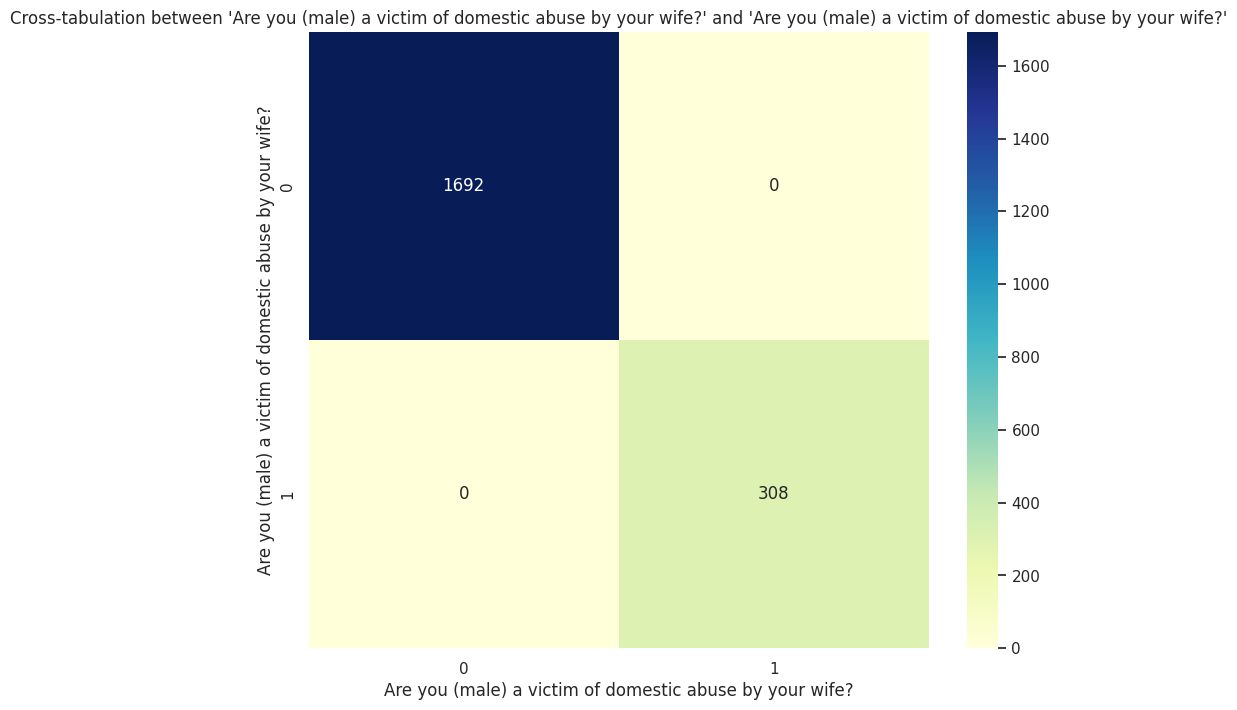

In [ ]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'

# Select the categorical variables for cross-tabulation
categorical_vars = ['Residence type','Place of residence', 'Age', 'Profession', 'Level of education', 'Family type', 'Family having children',
                    'Head of the family', 'Monthly income', 'Monthly income percentage allocated for wife',
                    'First torture experience', 'First type of torture', 'Current form of abuse', 'Place of most abuse',
                    'Type of marriage', 'Spouse divorced before the current marriage', 'Duration of current marriage',
                    'Extramarital affairs?', 'Level of satisfaction with marital life',
                    'Spouse physically capable of having sex', 'Level of satisfaction with sexual relationship patterns',
                    'Do you want Bangladesh to pass male torture law?', 'Are you (male) a victim of domestic abuse by your wife?']

# Set the size of the figure
plt.figure(figsize=(10, 8))

target_column = 'Are you (male) a victim of domestic abuse by your wife?'

# Plotting cross-tabulation for each pair of variables
for i in range(len(categorical_vars)):
  if i != target_column:
      cross_tab = pd.crosstab(df[categorical_vars[i]], df[target_column])
      plt.figure(figsize=(10, 8))
      sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d")
      plt.title(f"Cross-tabulation between '{categorical_vars[i]}' and '{target_column}'")
      plt.xlabel(target_column)
      plt.ylabel(categorical_vars[i])
      plt.show()


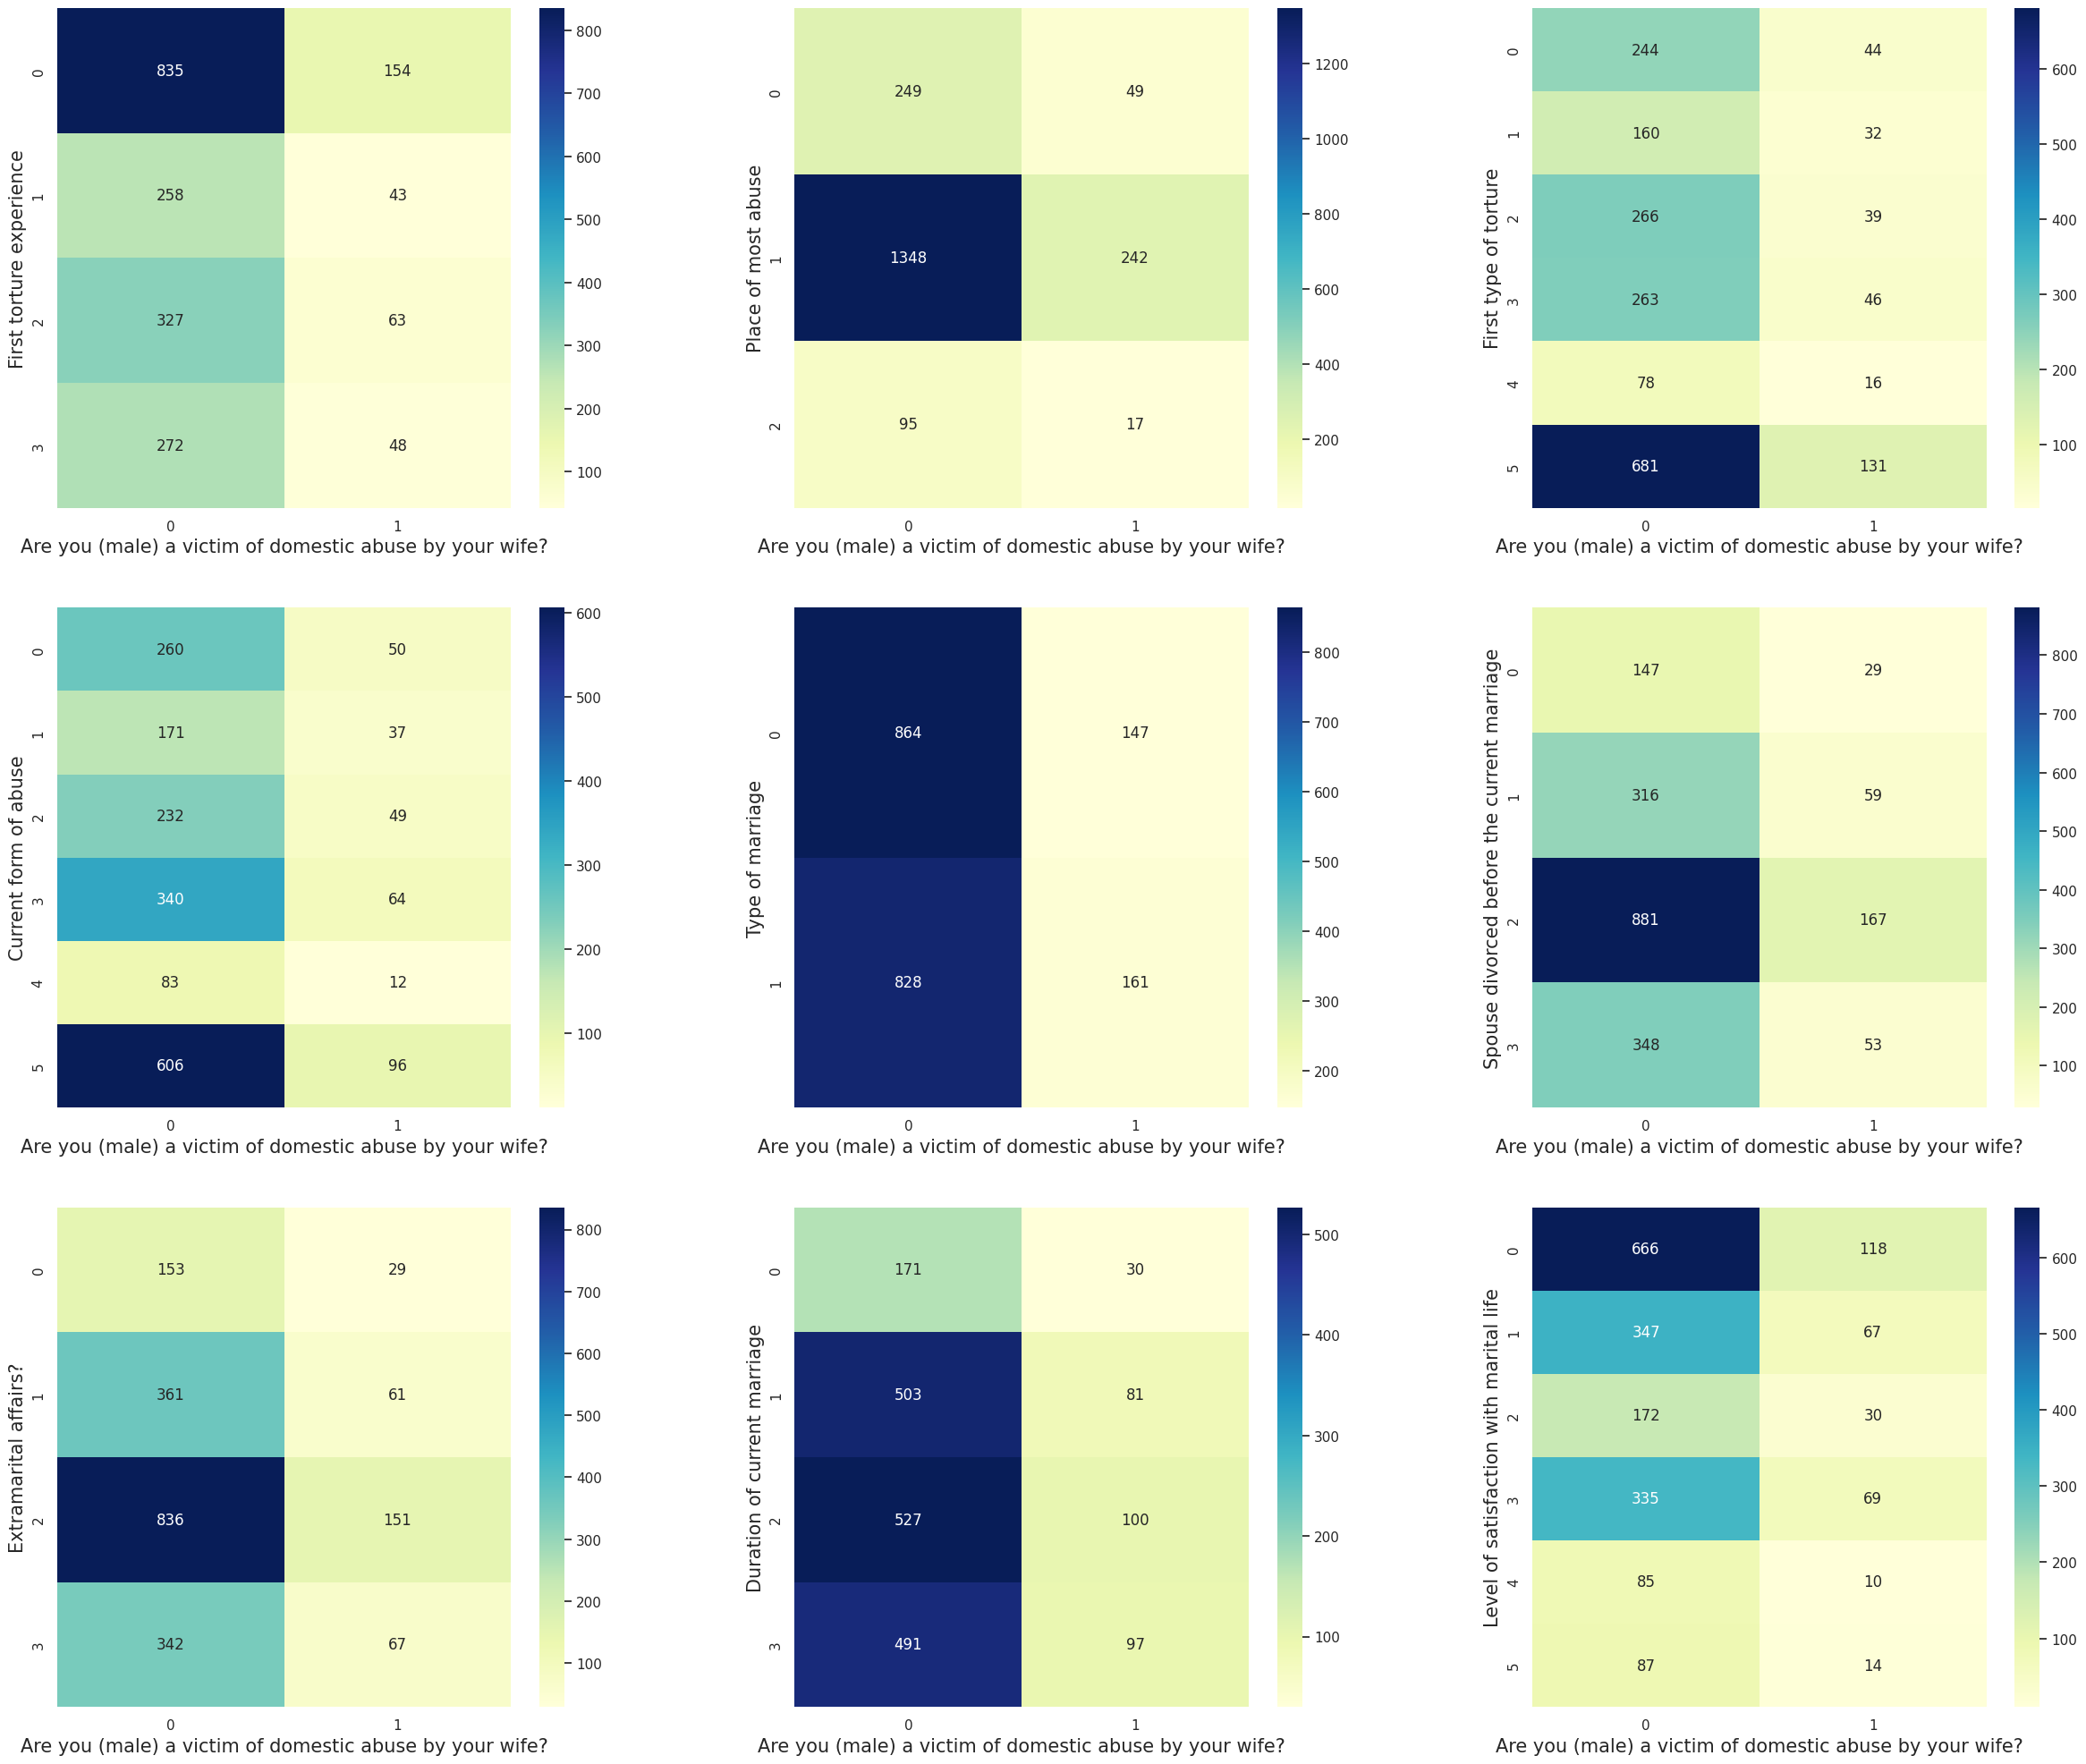

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is your DataFrame containing the data

df = dataset

# Define the categorical columns
categorical_columns = ['First torture experience', 'Place of most abuse', 'First type of torture', 'Current form of abuse',
                    'Type of marriage', 'Spouse divorced before the current marriage', 'Extramarital affairs?', 'Duration of current marriage',
                    'Level of satisfaction with marital life']

# categorical_columns = [
#   'Spouse physically capable of having sex', 'Level of satisfaction with sexual relationship patterns',
#   'Do you want Bangladesh to pass male torture law?'
# ]

# Define the size of the subplots grid
num_plots = len(categorical_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 7 * num_rows))
fig.tight_layout(pad=5)

target_column = 'Are you (male) a victim of domestic abuse by your wife?'

# Iterate over the categorical columns and plot the frequency of unique values
for i, name in enumerate(categorical_columns):
    if name != target_column:
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col] if num_rows > 1 else axs[col]

        cross_tab = pd.crosstab(df[name], df[target_column])
        sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d", ax=ax)

        ax.set_xlabel(target_column, fontsize=15)
        ax.set_ylabel(name, fontsize=15)
        ax.tick_params(axis='x')  # Rotate x-axis labels

# Delete the unused axes and plots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col] if num_rows > 1 else axs[col]
        fig.delaxes(ax)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.3)

# Save the plot
plt.savefig('crosstab2.png', bbox_inches='tight')

# Show the plot

plt.show()


### Chi-square Test

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataset is stored in a pandas DataFrame called 'df'
target_column = 'Are you (male) a victim of domestic abuse by your wife?'

# Create an empty dictionary to store the chi-square test results
chi2_results = {}

# Iterate over each column (excluding the target column)
for column in df.columns:
    if column != target_column:
        contingency_table = pd.crosstab(df[column], df[target_column])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_results[column] = {'Chi-square': chi2, 'p-value': p_value}

# Print the chi-square test results and conclusion for each column
for column, results in chi2_results.items():
    print(f"Column: {column}")
    print(f"Chi-square: {results['Chi-square']}")
    print(f"p-value: {results['p-value']}")

    # Check the p-value and provide a conclusion
    alpha = 0.1   # significance level

    if results['p-value'] < alpha:
        print("Conclusion: There is a significant association between the column and the target.")
    else:
        print("Conclusion: There is no significant association between the column and the target.")

    print()


Column: Residence type
Chi-square: 3.0196609918473096
p-value: 0.22094742627487904
Conclusion: There is no significant association between the column and the target.

Column: Place of residence
Chi-square: 7.487215293659554
p-value: 0.48508951722029403
Conclusion: There is no significant association between the column and the target.

Column: Age
Chi-square: 42.21349485478309
p-value: 0.017045964318925626
Conclusion: There is a significant association between the column and the target.

Column: Profession
Chi-square: 4.609167900548584
p-value: 0.32979851558083645
Conclusion: There is no significant association between the column and the target.

Column: Level of education
Chi-square: 0.6012319181851079
p-value: 0.7403620474692012
Conclusion: There is no significant association between the column and the target.

Column: Family type
Chi-square: 0.31129867743007406
p-value: 0.8558592544634313
Conclusion: There is no significant association between the column and the target.

Column: Fami

### Frequency Analysis

In [ ]:
#@title
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Load dataset
dataset = pd.read_csv("/content/male_abuse_2k_data.csv")
df = dataset
target = 'Are you (male) a victim of domestic abuse by your wife?'
for i in dataset.columns:
  print(i+': ')
  print(dataset[i].unique())
  print()

Residence type: 
['urban' 'rural' 'suburban']

Place of residence: 
['Dhaka' 'Barisal' 'Rangpur' 'Sylhet' 'Comilla' 'Khulna' 'Mymensingh'
 'Rajshahi' 'Chittagong']

Age: 
[41 22 23 29 43 30 38 40 21 31 39 25 32 20 35 44 34 27 37 24 45 26 42 36
 33 28]

Profession: 
['Unemployed' 'Employed' 'Businessman' 'Abroad' 'Student']

Level of education: 
['High school' 'Postgraduate' 'Graduate']

Family type: 
['Single family' 'Joint family (without in-laws)'
 'Joint family (with in-laws)']

Family having children: 
['married without children' 'married with children']

Head of the family: 
[1 0]

Monthly income: 
['0' '50000-More' '25001-50000' '15001-25000' '5001-10000']

Monthly income percentage allocated for wife: 
['0%' '51-75%' '100%' '31-50%' '1-10%' '11-30%']

First torture experience: 
['Within 6 months to 12 months of marriage' 'After 12 months of marriage'
 'Between 2nd to 6th month of marriage' 'Within the 1st month of marriage']

First type of torture: 
['Physical, mental, verbal' '

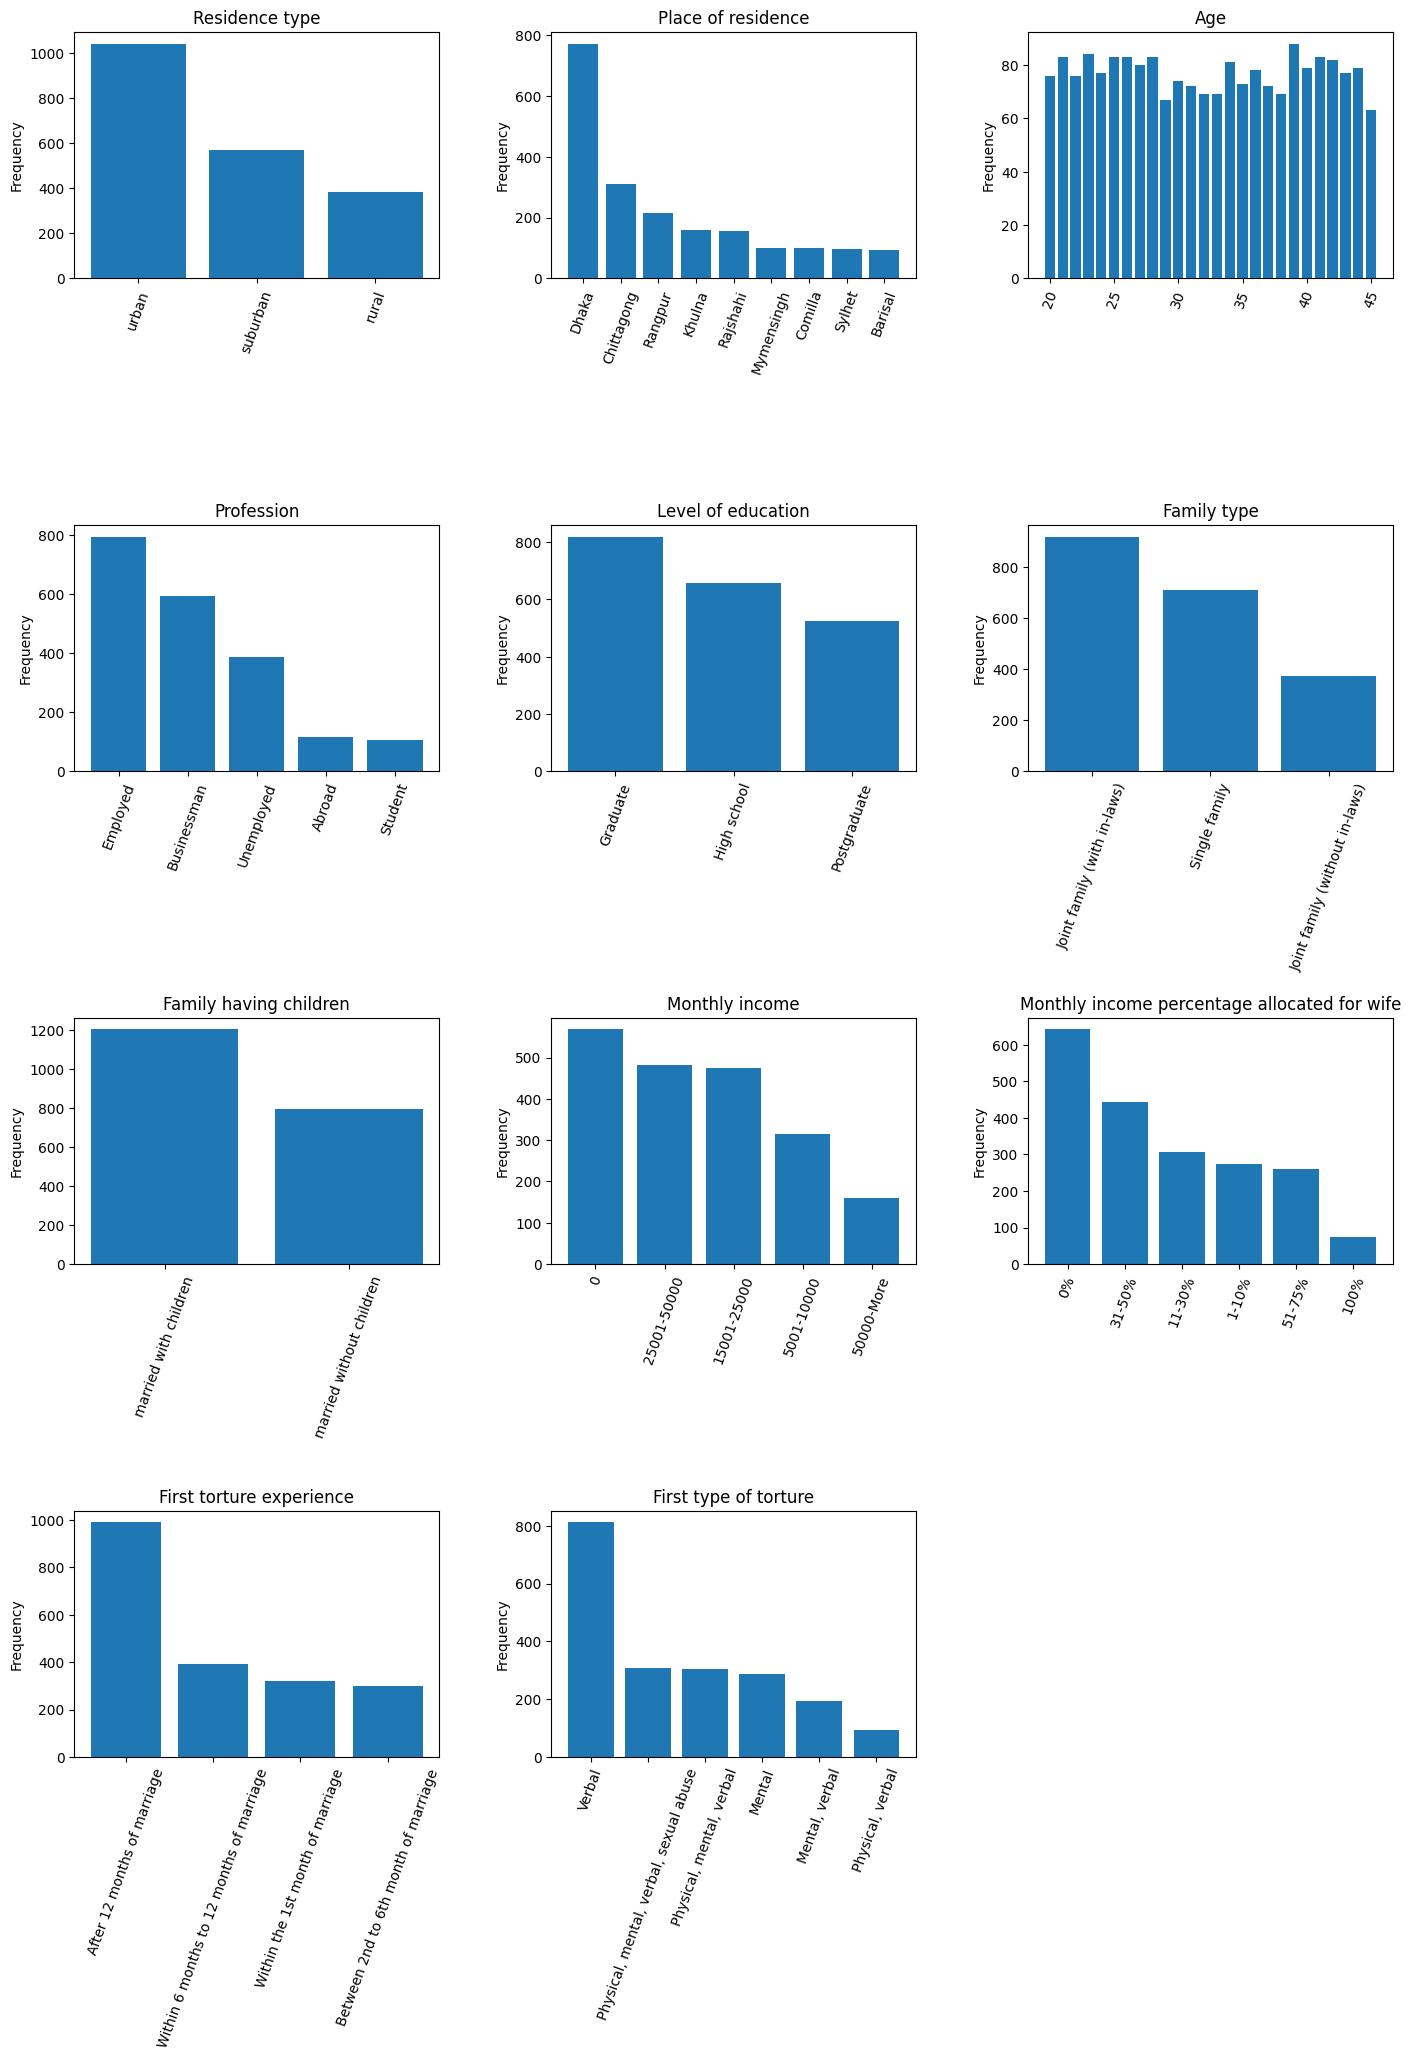

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

df = dataset
# Define the categorical columns
categorical_columns = ['Residence type','Place of residence', 'Age', 'Profession', 'Level of education', 'Family type',
                       'Family having children', 'Monthly income', 'Monthly income percentage allocated for wife',
                       'First torture experience', 'First type of torture']

# Define the size of the subplots grid
num_plots = len(categorical_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=5)

# Iterate over the categorical columns and plot the frequency of unique values
for (i, col), name in zip(enumerate(categorical_columns),categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]

    # Calculate the frequency of unique values
    value_counts = df[name].value_counts()

    # Plot the bar chart
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(name)
    #ax.set_xlabel('Categories')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=70)  # Rotate x-axis labels

# Delete the unused axes and plots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col] if num_rows > 1 else axs[col]
        fig.delaxes(ax)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=1)

# Adjust the bottom margin to include the entire plot
plt.subplots_adjust(bottom=0.1)

plt.savefig('frequency_analysis1.png', bbox_inches='tight')
# Show the plot
plt.show()


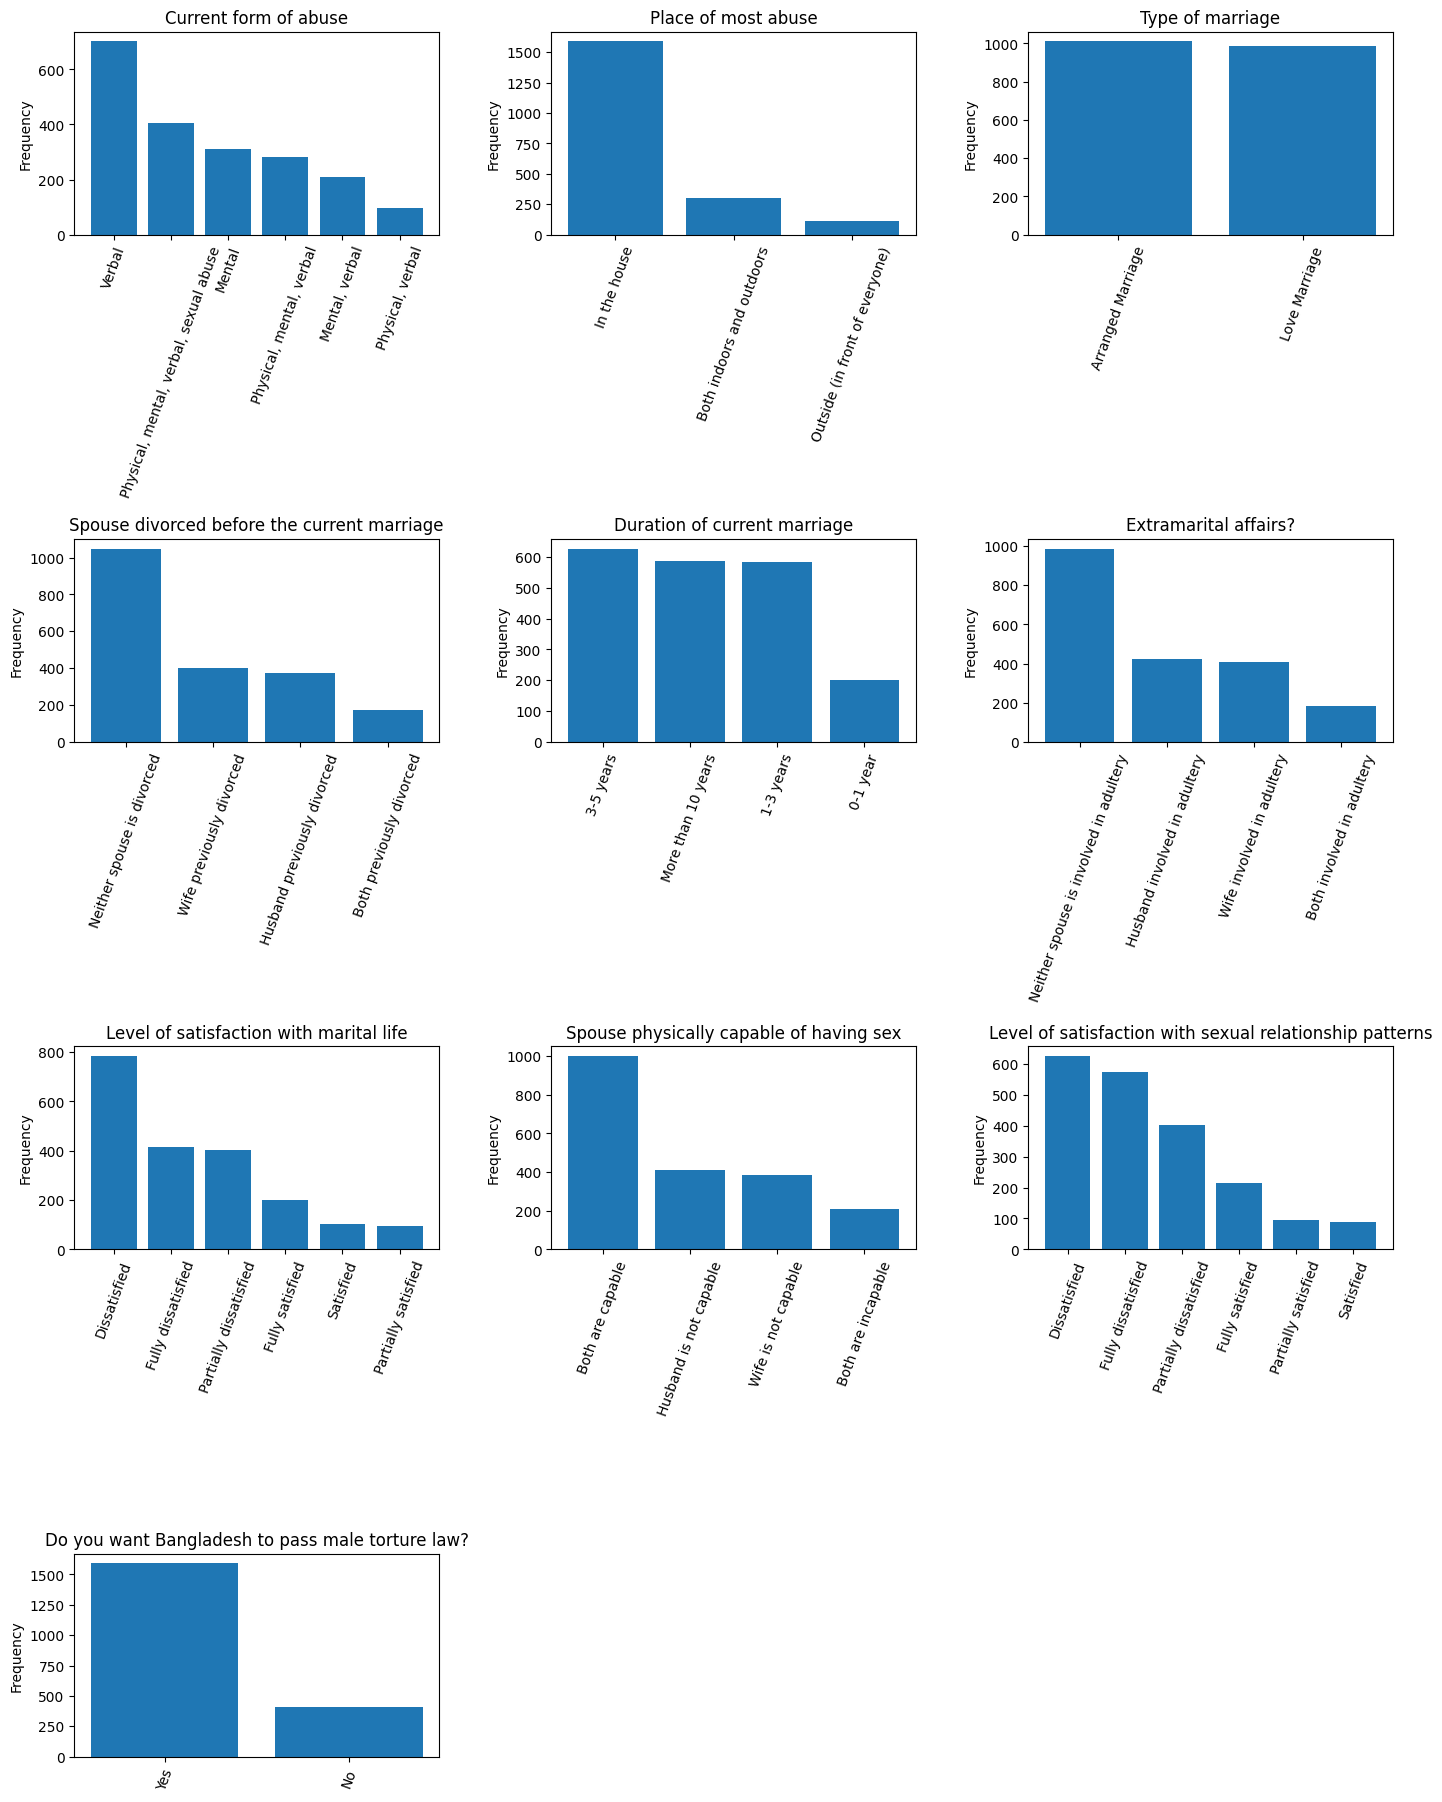

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

df = dataset
# Define the categorical columns
categorical_columns = ['Current form of abuse',
                       'Place of most abuse', 'Type of marriage', 'Spouse divorced before the current marriage',
                       'Duration of current marriage', 'Extramarital affairs?',
                       'Level of satisfaction with marital life', 'Spouse physically capable of having sex',
                       'Level of satisfaction with sexual relationship patterns',
                       'Do you want Bangladesh to pass male torture law?']

# Define the size of the subplots grid
num_plots = len(categorical_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=5)

# Iterate over the categorical columns and plot the frequency of unique values
for (i, col), name in zip(enumerate(categorical_columns),categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]

    # Calculate the frequency of unique values
    value_counts = df[name].value_counts()

    # Plot the bar chart
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(name)
    #ax.set_xlabel('Categories')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=70)  # Rotate x-axis labels

# Delete the unused axes and plots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col] if num_rows > 1 else axs[col]
        fig.delaxes(ax)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=1.5)

# Adjust the bottom margin to include the entire plot
plt.subplots_adjust(bottom=0.1)

plt.savefig('frequency_analysis2.png', bbox_inches='tight')
# Show the plot
plt.show()


### Impact of Torture Experience

In [ ]:
#@title
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Load dataset
dataset = pd.read_csv("/content/male_abuse_2k_data.csv")
df = dataset
target = 'Are you (male) a victim of domestic abuse by your wife?'

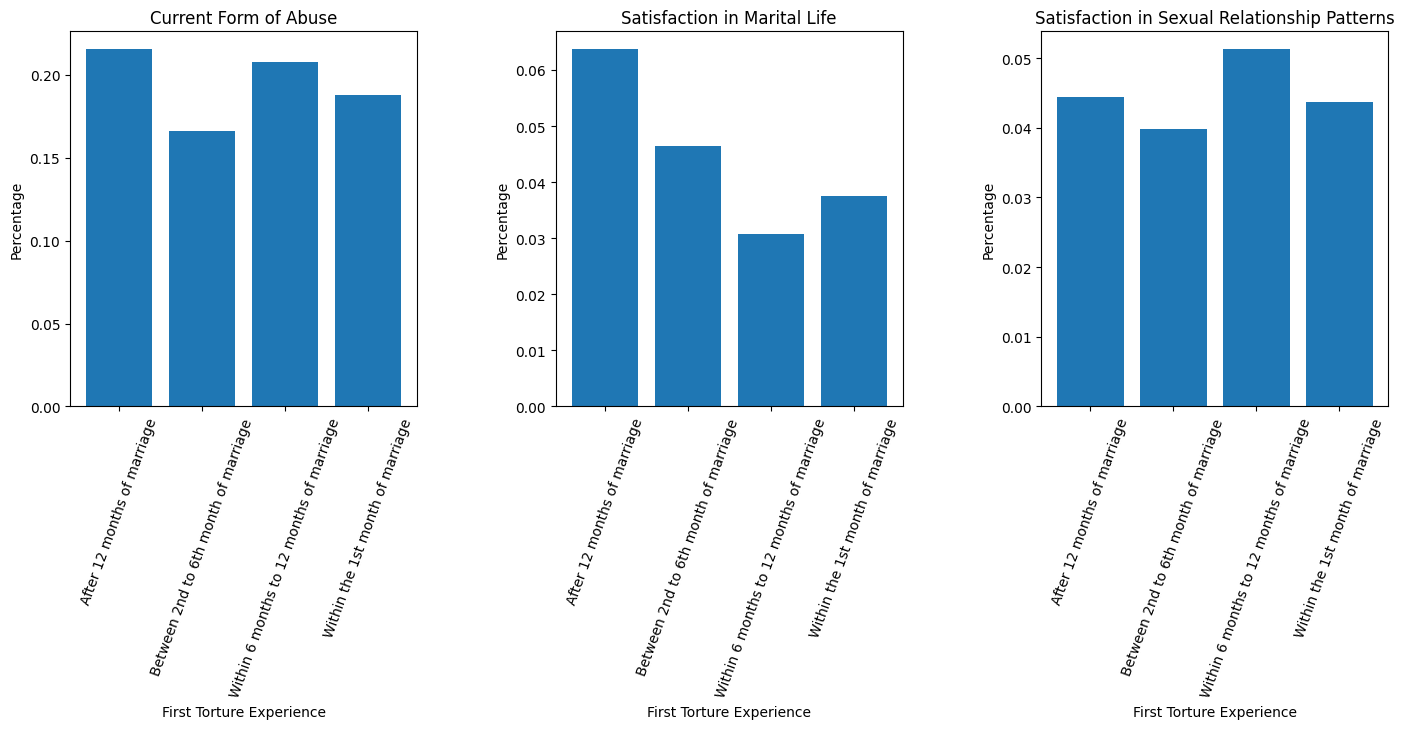

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns for analysis
relevant_columns = ['First torture experience', 'Current form of abuse',
                    'Level of satisfaction with marital life',
                    'Level of satisfaction with sexual relationship patterns']

# Filter out rows with missing values in relevant columns
df_filtered = df.dropna(subset=relevant_columns)

# Group the data by the first torture experience
grouped_data = df_filtered.groupby('First torture experience')

# Calculate the average occurrence of different current forms of abuse
current_abuse_counts = grouped_data['Current form of abuse'].value_counts(normalize=True).unstack()

# Calculate the average satisfaction levels in marital life and sexual relationship patterns
satisfaction_marital = grouped_data['Level of satisfaction with marital life'].value_counts(normalize=True).unstack()
satisfaction_sexual = grouped_data['Level of satisfaction with sexual relationship patterns'].value_counts(normalize=True).unstack()

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=5)

# Plot the occurrence of current forms of abuse
axs[0].bar(current_abuse_counts.index, current_abuse_counts['Physical, mental, verbal, sexual abuse'])
axs[0].set_title('Current Form of Abuse')
axs[0].set_xlabel('First Torture Experience')
axs[0].set_ylabel('Percentage')
axs[0].tick_params(axis='x', rotation=70)

# Plot the satisfaction levels in marital life
axs[1].bar(satisfaction_marital.index, satisfaction_marital['Satisfied'])
axs[1].set_title('Satisfaction in Marital Life')
axs[1].set_xlabel('First Torture Experience')
axs[1].set_ylabel('Percentage')
axs[1].tick_params(axis='x', rotation=70)

# Plot the satisfaction levels in sexual relationship patterns
axs[2].bar(satisfaction_sexual.index, satisfaction_sexual['Satisfied'])
axs[2].set_title('Satisfaction in Sexual Relationship Patterns')
axs[2].set_xlabel('First Torture Experience')
axs[2].set_ylabel('Percentage')
axs[2].tick_params(axis='x', rotation=70)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(bottom=0.1)

plt.savefig('Impact of Torture Experience.png', bbox_inches='tight')

# Show the plot
plt.show()


### Demographic Analysis

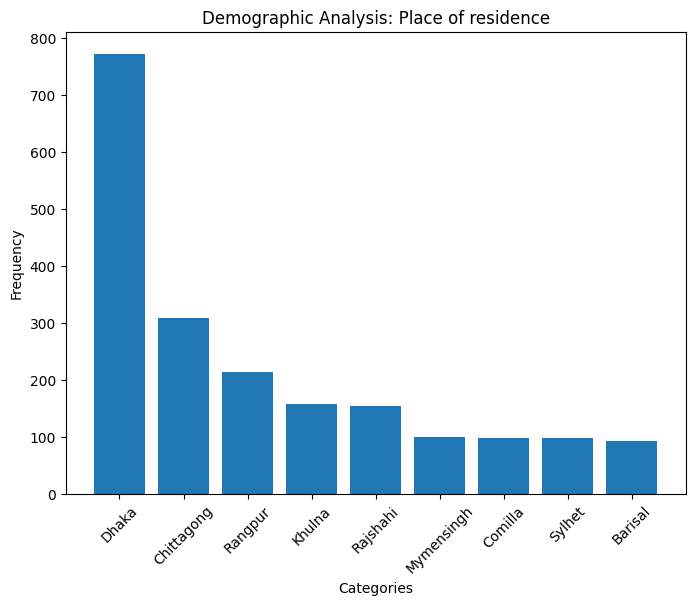

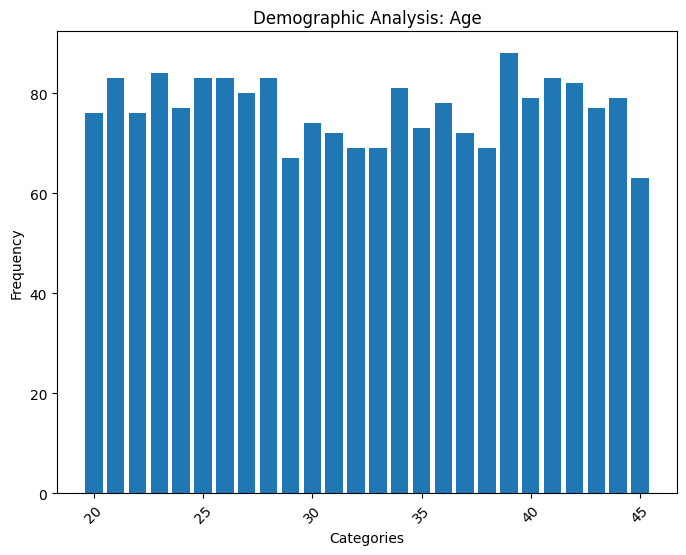

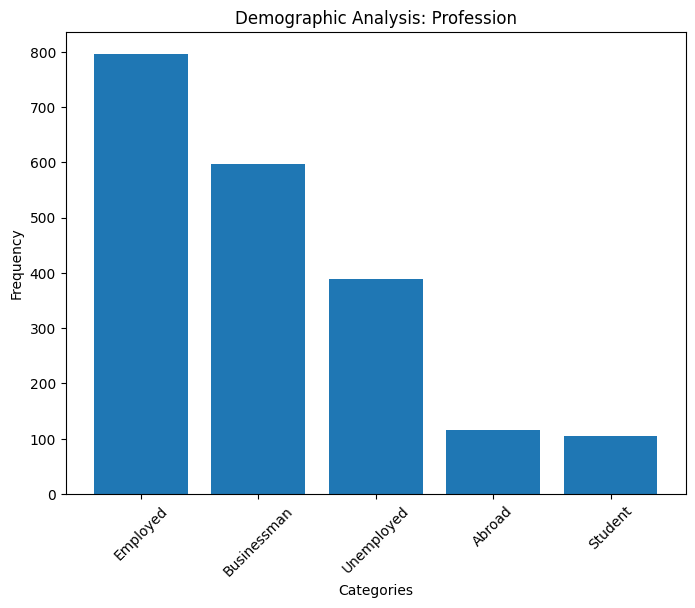

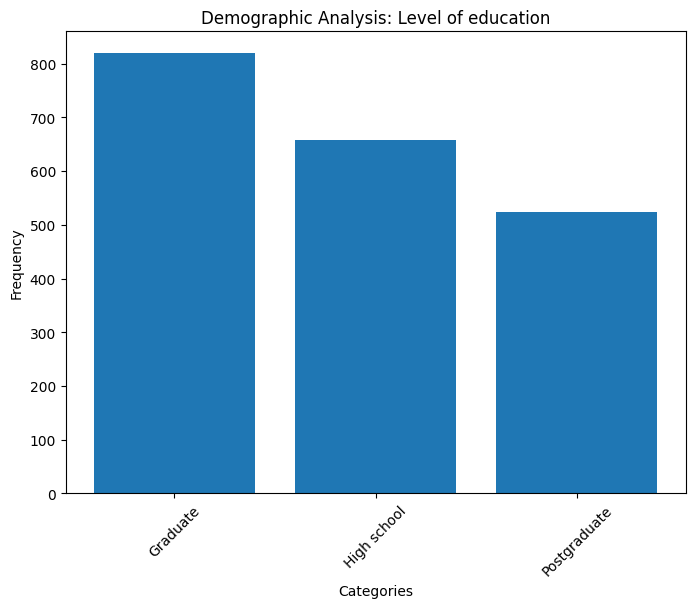

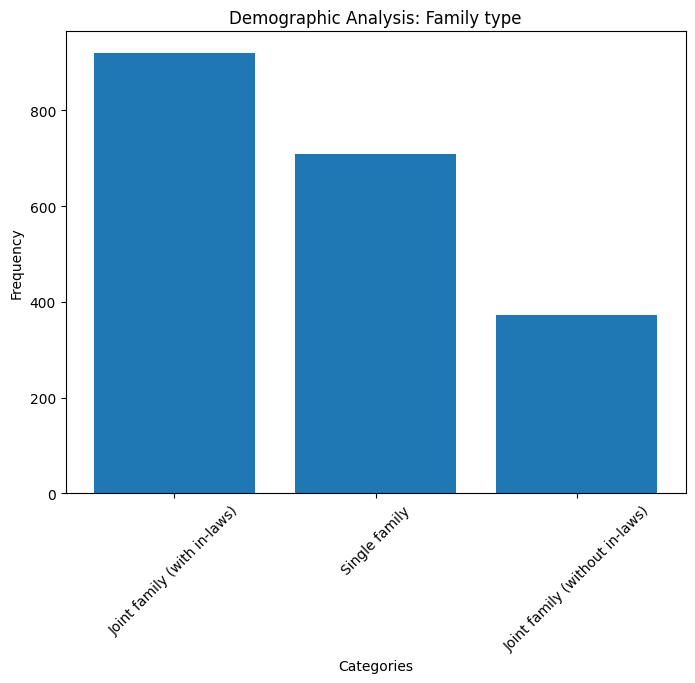

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

# Define the demographic columns of interest
demographic_columns = ['Place of residence', 'Age', 'Profession', 'Level of education', 'Family type']

# Perform demographic analysis
for col in demographic_columns:
    # Calculate the frequency of unique values
    value_counts = df[col].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Demographic Analysis: {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.savefig('{}.png'.format(col), bbox_inches='tight')
    plt.show()


In [ ]:
#@title
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Load dataset
dataset = pd.read_csv("/content/male_abuse_2k_data.csv")

target = 'Are you (male) a victim of domestic abuse by your wife?'

dataset.columns


Index(['Residence type', 'Place of residence', 'Age', 'Profession',
       'Level of education', 'Family type', 'Family having children',
       'Head of the family', 'Monthly income',
       'Monthly income percentage allocated for wife',
       'First torture experience', 'First type of torture',
       'Current form of abuse', 'Place of most abuse', 'Type of marriage',
       'Spouse divorced before the current marriage',
       'Duration of current marriage', 'Extramarital affairs?',
       'Level of satisfaction with marital life',
       'Spouse physically capable of having sex',
       'Level of satisfaction with sexual relationship patterns',
       'Do you want Bangladesh to pass male torture law?',
       'Are you (male) a victim of domestic abuse by your wife?'],
      dtype='object')

In [ ]:
df2 = dataset

In [ ]:
df = dataset.copy()

In [ ]:
#@title
from sklearn import metrics, preprocessing
features = [x for x in df.columns if x not in ["Are you (male) a victim of domestic abuse by your wife?",'Age']]

for feat in features:
    lbl_enc = preprocessing.LabelEncoder()
    df[feat] = lbl_enc.fit_transform(df[feat].fillna("-1").astype(str).values)

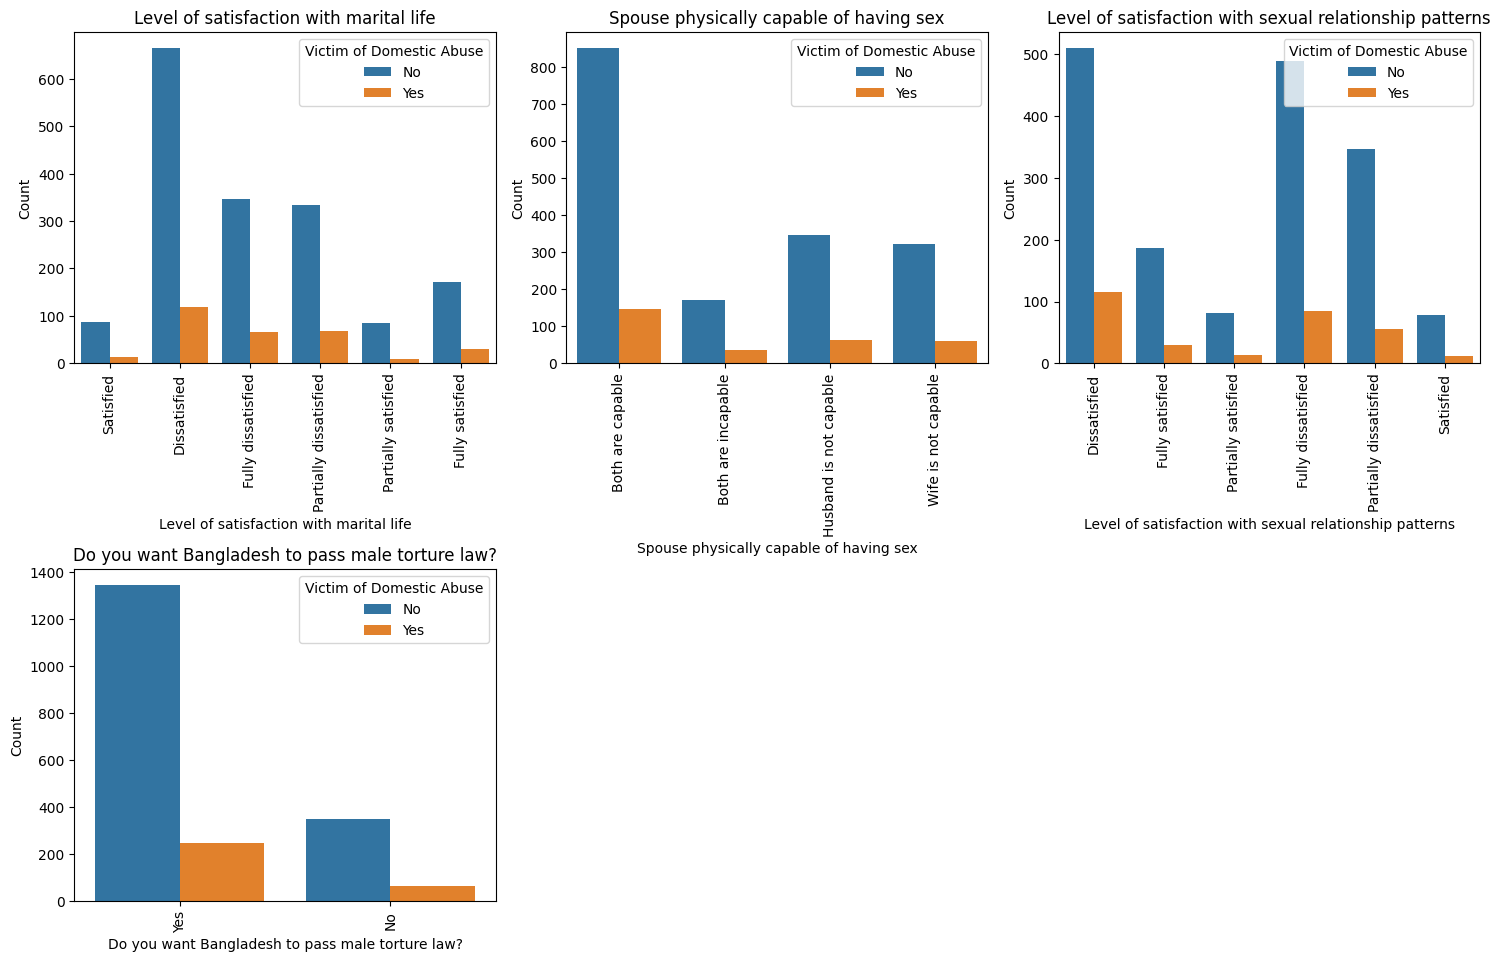

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame called 'data'
# and the target binary feature is called 'Are you (male) a victim of domestic abuse by your wife?'
data = df
# Set the figure size
plt.figure(figsize=(15, 58))

# Get the number of columns (excluding the target column)
num_columns = len(data.columns) - 1

# Calculate the number of rows and columns for subplots
num_rows = (num_columns // 2) + (num_columns % 2)

# Iterate through each column (except the target column)
for i, column in enumerate(data.columns[18:24]): # change this number [0:9]
    if column != 'Are you (male) a victim of domestic abuse by your wife?':
        # Create a new subplot
        plt.subplot(num_rows, 3, i+1)

        # Plot countplot grouped by the target column
        sns.countplot(data=data, x=column, hue='Are you (male) a victim of domestic abuse by your wife?')

        # Set the labels and title
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column}')

        # Rotate the x-axis labels for better readability (optional)
        plt.xticks(rotation=90)

        # Modify the legend
        plt.legend(title='Victim of Domestic Abuse', labels=['No', 'Yes'])

# Adjust the spacing between subplots
plt.tight_layout()
#plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(bottom=0.01)

plt.savefig('countplot_groupby_target3.png', bbox_inches='tight')
# Show the plot
plt.show()


In [ ]:
# @title
!pip install dython

In [ ]:
# @title
data = df
data

,Residence type,Place of residence,Age,Profession,Level of education,Family type,Family having children,Head of the family,Monthly income,Monthly income percentage allocated for wife,...,Place of most abuse,Type of marriage,Spouse divorced before the current marriage,Duration of current marriage,Extramarital affairs?,Level of satisfaction with marital life,Spouse physically capable of having sex,Level of satisfaction with sexual relationship patterns,Do you want Bangladesh to pass male torture law?,Are you (male) a victim of domestic abuse by your wife?
0,2,3,41,4,1,2,1,1,0,0,...,1,0,2,3,1,5,0,0,1,0
1,2,0,22,2,2,2,1,1,3,5,...,1,1,2,3,2,0,1,2,1,1
2,0,7,23,4,1,1,1,1,0,0,...,1,0,0,0,0,0,2,4,1,0
3,2,8,29,1,0,0,0,1,2,2,...,1,0,2,3,2,1,0,0,0,1
4,2,3,43,2,0,0,1,0,1,4,...,1,1,3,1,2,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,2,38,4,1,2,0,1,0,0,...,1,0,3,3,3,0,3,3,1,0
1996,2,4,43,1,1,0,1,0,4,3,...,0,1,2,3,0,0,3,0,0,0
1997,2,6,39,1,0,2,1,1,4,4,...,1,0,3,1,3,2,0,3,1,1
1998,2,0,20,4,1,0,0,1,0,0,...,1,1,1,3,1,1,0,0,1,1


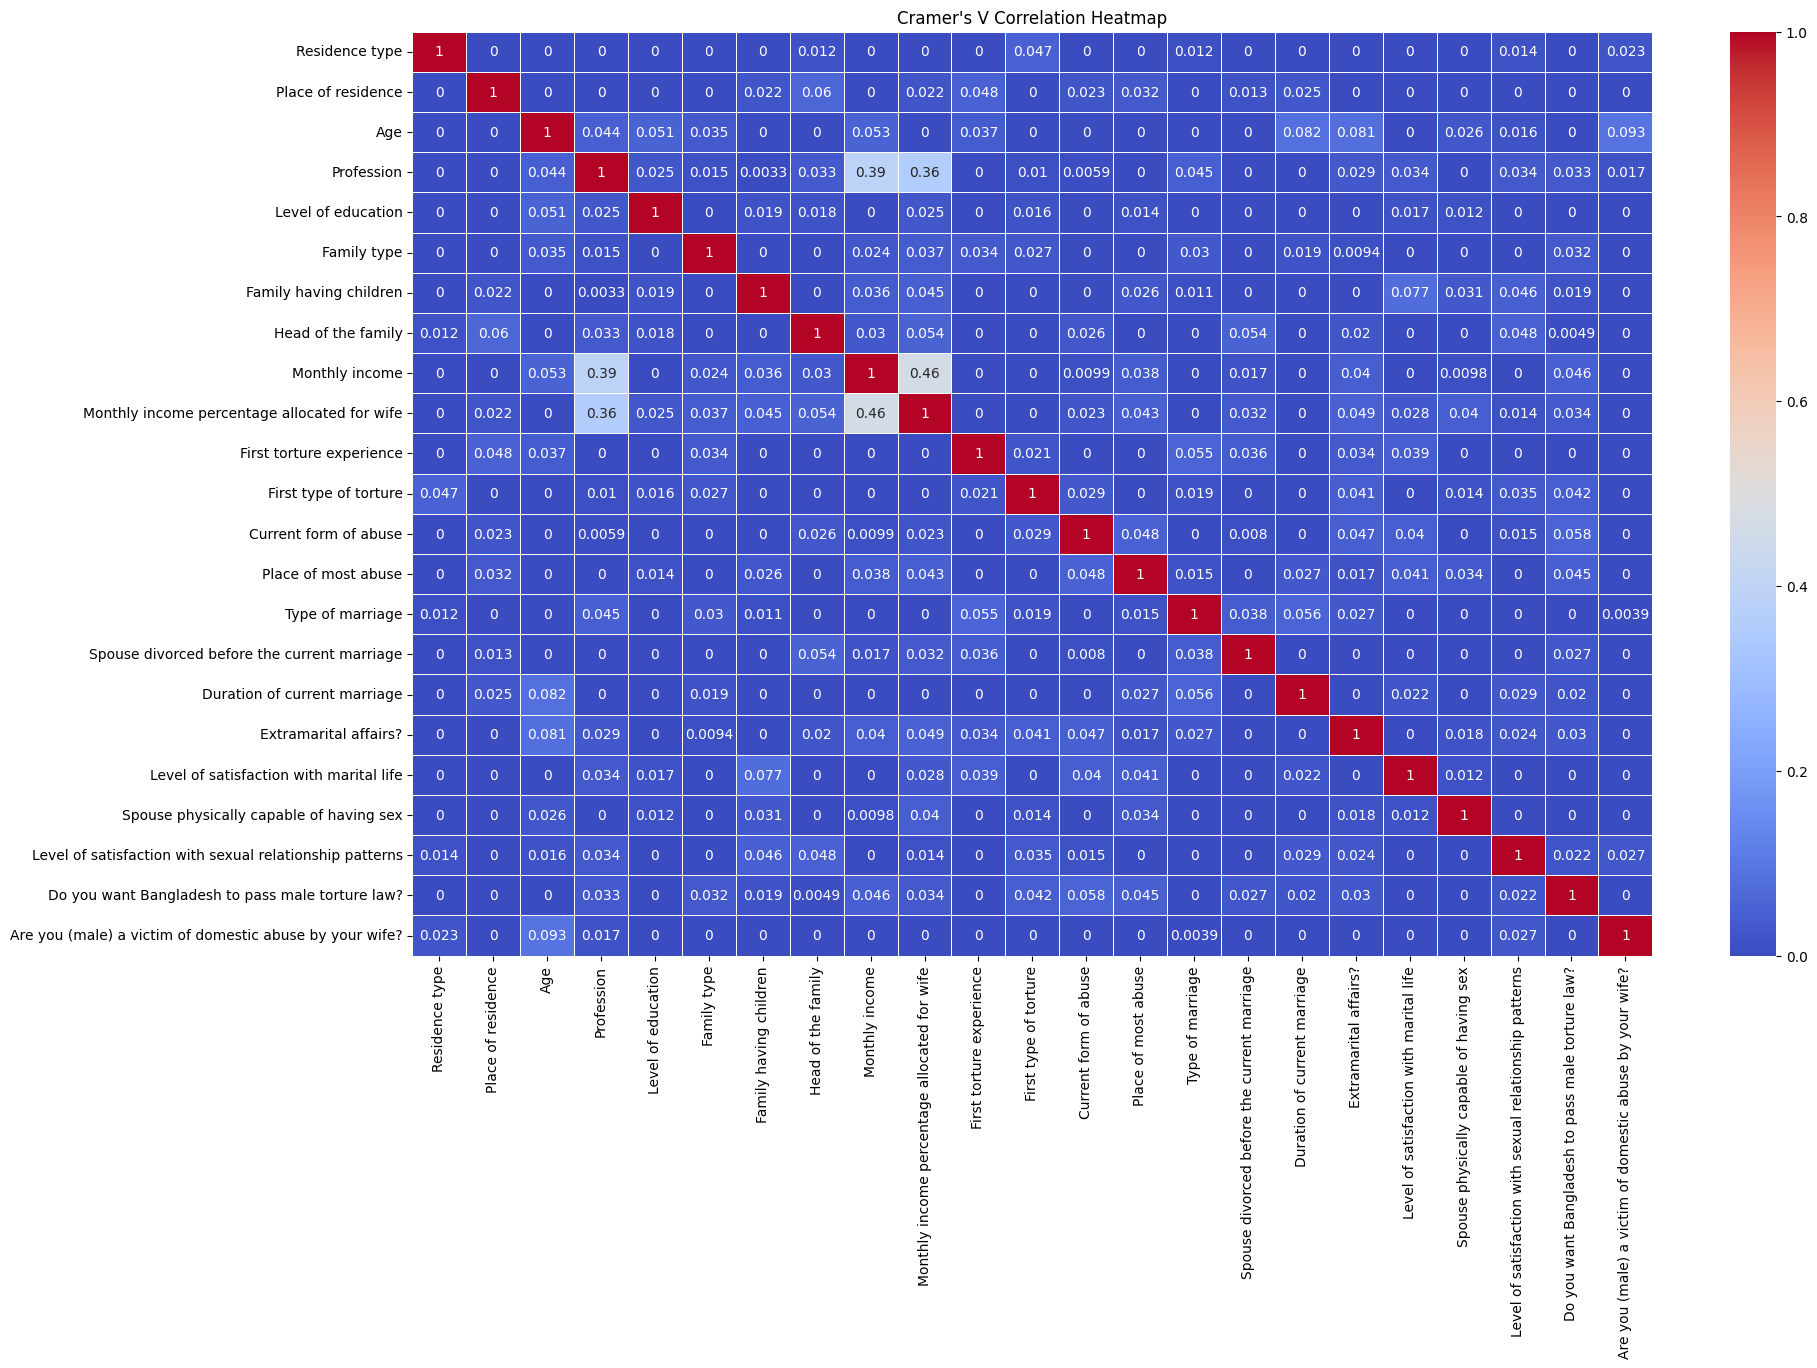

In [ ]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import cramers_v

# Assuming your dataset is stored in a pandas DataFrame called 'data'
# with the categorical features you want to analyze

# Calculate the Cramer's V correlation matrix
corr_matrix = pd.DataFrame(index=data.columns, columns=data.columns)
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        if i == j:
            corr_matrix.iloc[i, j] = 1.0
        else:
            corr_matrix.iloc[i, j] = cramers_v(data.iloc[:, i], data.iloc[:, j])

# Convert the correlation matrix values to float
corr_matrix = corr_matrix.astype(float)

# Set the figure size
plt.figure(figsize=(20, 12))

# Create the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title("Cramer's V Correlation Heatmap")

# Show the plot
plt.savefig('cramer_v_correlation.png', bbox_inches='tight')
plt.show()


In [ ]:
## 4th plot
    ['Age', 'Level of satisfaction with sexual relationship patterns'],
    ['Age', 'Do you want Bangladesh to pass male torture law?']

## 2nd plot
    ['Level of education', 'Level of satisfaction with marital life'],
    ['Family type', 'Type of marriage'],
    ['Monthly income', 'Level of satisfaction with marital life'],
    ['Profession', 'Current form of abuse']

## 1st plot
    ['Residence type', 'Level of satisfaction with marital life'],
    ['Place of residence', 'Type of marriage'],
    ['Family having children', 'Spouse physically capable of having sex'],
    ['Profession', 'Extramarital affairs?']

## 3rd plot
    ['Level of education', 'Duration of current marriage'],
    ['Family type', 'Place of most abuse'],
    ['Place of residence', 'Extramarital affairs?'],


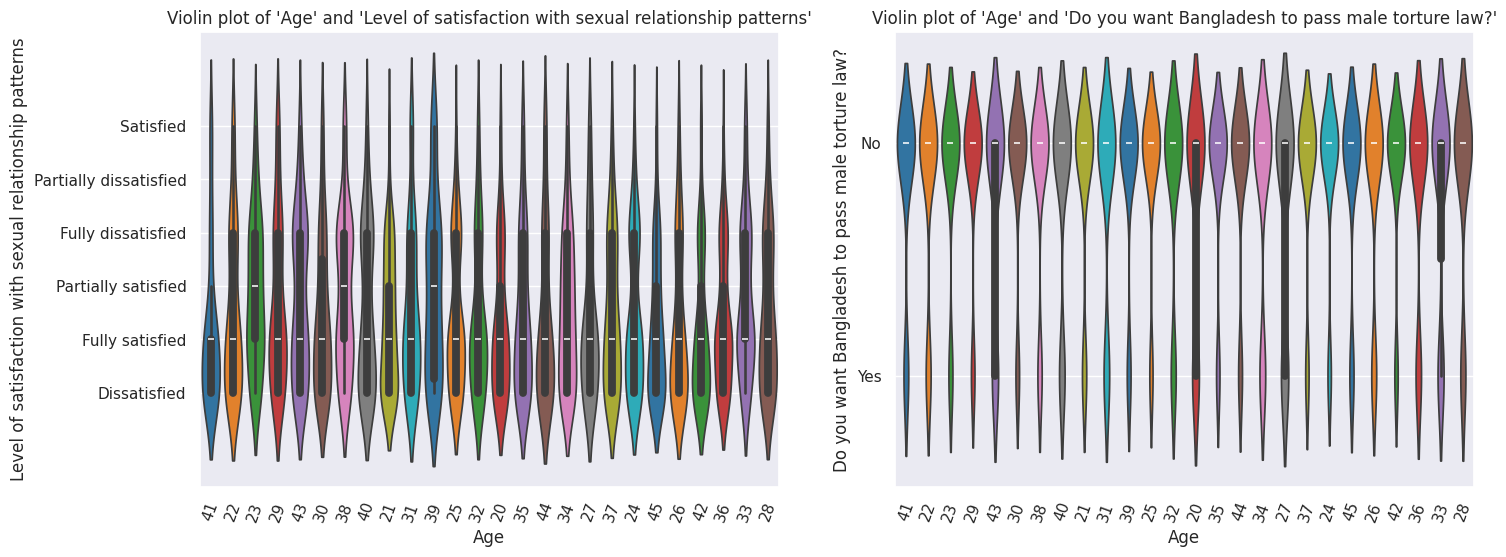

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical feature combinations
feature_combinations = [
    ['Age', 'Level of satisfaction with sexual relationship patterns'],
    ['Age', 'Do you want Bangladesh to pass male torture law?']

]

# Define the size of the subplots grid
num_plots = len(feature_combinations)
num_cols = 2  # Number of columns in the grid
num_rows = (num_plots - 1) // num_cols + 1

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.tight_layout(pad=5)

# Define the color palette
sns.set(style="darkgrid")
palette = sns.color_palette("tab10")

# Iterate over the feature combinations and plot violin plots
for i, (feat1, feat2) in enumerate(feature_combinations):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]

    sns.violinplot(x=df[feat1], y=df[feat2], ax=ax, palette=palette)

    ax.set_title(f"Violin plot of '{feat1}' and '{feat2}'")
    ax.set_xlabel(feat1)
    ax.set_ylabel(feat2)
    ax.set_xticks(range(len(df2[feat1].unique())))  # Set x-axis tick locations to integer points
    ax.set_yticks(range(len(df2[feat2].unique())))  # Set x-axis tick locations to integer points
    ax.set_xticklabels(df2[feat1].unique())  # Set original categorical values as tick labels
    ax.set_yticklabels(df2[feat2].unique())  # Set original categorical values as tick labels
    ax.tick_params(axis='x', rotation=70)  # Rotate x-axis labels

# Delete the unused axes and plots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col] if num_rows > 1 else axs[col]
        fig.delaxes(ax)

# Adjust the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(bottom=0.01)

# Save the plot
plt.savefig('violin_subplots4.png', bbox_inches='tight')

# Show the plot
plt.show()


In [2]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 2.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('male_abuse_2k_data.csv')

# --- Reliability Analysis (Cronbach's Alpha) ---

# Define the items for the abuse scale
abuse_types = ['Physical', 'mental', 'verbal', 'sexual abuse']
abuse_df = pd.DataFrame()

# Create binary columns for each abuse type based on two source columns
for abuse_type in abuse_types:
    abuse_df[abuse_type] = df.apply(
        lambda row: 1 if (abuse_type in str(row['First type of torture'])) or (abuse_type in str(row['Current form of abuse'])) else 0,
        axis=1
    )

# Manually calculate Cronbach's Alpha
k = abuse_df.shape[1]
item_variances = abuse_df.var(ddof=0)
sum_of_item_variances = item_variances.sum()

total_scores = abuse_df.sum(axis=1)
variance_of_total_scores = total_scores.var(ddof=0)

cronbach_alpha = (k / (k - 1)) * (1 - (sum_of_item_variances / variance_of_total_scores))

print(f"Items in the scale: {k}")
print(f"Calculated Cronbach's Alpha: {cronbach_alpha:.4f}")

Items in the scale: 4
Calculated Cronbach's Alpha: 0.8869


In [6]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=8d8a7e25eccde114254a93e44f96e36d9c2fe0681545c1ee1418b26542aa5d48
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [7]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt

# --- Construct Validity (Exploratory Factor Analysis) ---

# Select and label-encode variables for factor analysis
factor_df = df[['Level of satisfaction with marital life',
                'Extramarital affairs?',
                'Type of marriage',
                'Duration of current marriage',
                'Current form of abuse',
                'Monthly income',
                'Level of education',
                'Profession']].apply(lambda x: x.astype('category').cat.codes)

# KMO and Bartlett's Test
kmo_all, kmo_model = calculate_kmo(factor_df)
chi_square_value, p_value = calculate_bartlett_sphericity(factor_df)

print(f"KMO Test Statistic: {kmo_model:.3f}")
print(f"Bartlett's Test p-value: {p_value}")

# Determine the number of factors using eigenvalues (scree plot)
fa_ev = FactorAnalyzer(rotation=None, n_factors=factor_df.shape[1])
fa_ev.fit(factor_df)
ev, v = fa_ev.get_eigenvalues()

# Perform Factor Analysis with 3 factors (identified from scree plot) and Varimax rotation
n_factors = 3
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(factor_df)

# Display factor loadings
loadings = pd.DataFrame(fa.loadings_, index=factor_df.columns, columns=[f'Factor {i+1}' for i in range(n_factors)])
print("\nFactor Loadings:")
print(loadings)

KMO Test Statistic: 0.505
Bartlett's Test p-value: 4.701882363518121e-84

Factor Loadings:
                                         Factor 1  Factor 2  Factor 3
Level of satisfaction with marital life  0.992262  0.016001 -0.100962
Extramarital affairs?                   -0.009650  0.033741  0.051993
Type of marriage                        -0.003982  0.016117 -0.035029
Duration of current marriage             0.057308 -0.004950  0.047890
Current form of abuse                    0.022104  0.996907 -0.026804
Monthly income                          -0.064249 -0.021654 -0.570491
Level of education                       0.021942 -0.000355  0.027600
Profession                               0.089920  0.045135  0.778105


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
